# Inspecting Tables and Spreadsheets

## Playing around

In [37]:
import requests
import tempfile
import string
import re
import sys
import time
import json
import os
import csv
from urllib.parse import urlparse
from random import sample
from IPython.display import display, Markdown
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt


In [2]:
os.listdir()

['sample_csvs_2024-09-27_02-15-58',
 'uniq_links.txt',
 'check_urls.py',
 'sample_csvs_2024-10-01_01-30-44',
 'valid_urls.txt',
 'sample_urls.py',
 'sample_csvs_2024-10-02_21-42-02',
 'csv_reader.ipynb',
 '.ipynb_checkpoints',
 'uniq_links_copy.txt',
 'sample_csvs_2024-09-26_19-46-26',
 'venv',
 '.git']

In [3]:
csvs_directory = 'sample_csvs_2024-09-27_02-15-58'

In [4]:
dataframes = []
file_names = os.listdir(csvs_directory)

In [5]:
for file_name in file_names:
    if file_name.endswith('.csv'):
        # Full file path
        file_path = os.path.join(csvs_directory, file_name)
        try:
            # Load the csv file into a dataframe and don't infer header
            df = pd.read_csv(file_path, encoding = "ISO-8859-1", header=None, index_col=False, low_memory=False)
            
            # Add the dataframe to the list
            dataframes.append(df)
        except Exception as e:
            print(f"problem reading file {file_name}")
            print(e)

len(dataframes)

problem reading file orr_gov_uk___data_assets_file_0014_23261_spending_october_2016.csv
Error tokenizing data. C error: Expected 1 fields in line 10, saw 2



57

In [6]:
for idx, csv in enumerate(dataframes):
    display(Markdown(f"### DataFrame: {file_names[idx]}\n index: {idx}"))
    display(csv)

### DataFrame: nice_org_uk_Media_Default_About_Who_we_are_Corporate_publications_Publication_scheme_Transparency_of_spend_Fiscal_20Year_202015_2016_Transparency_of_Spend_over_25k_July_2015.csv
 index: 0

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Department Family,Entity,Date,Expense Type,Expense Area,Supplier,Transaction Number,Amount,Description,Supplier Postcode,Supplier Type,Contract Number,Project Code,Expenditure Type
1,Department of Health,National Institute for Health & Care Excellence,01/07/2015,Contr Other External,NP-CP Guidelines,ROYAL COLLEGE OF PSYCHIATRISTS,14298874,266800.8,National Collaborating Centre work on Mental H...,NaN,NaN,NaN,NaN,NaN
2,Department of Health,National Institute for Health & Care Excellence,01/07/2015,Rent,NP - Facilities - London,BRITISH COUNCIL,14299154,193121.91,Rent payment for office space at 10 Spring Gar...,NaN,NaN,NaN,NaN,NaN
3,Department of Health,National Institute for Health & Care Excellence,01/07/2015,Service Charge,NP - Facilities - London,BRITISH COUNCIL,14299154,23791.42,Service charge payment for office space at 10 ...,NaN,NaN,NaN,NaN,NaN
4,Department of Health,National Institute for Health & Care Excellence,01/07/2015,Rent,NP- Facilities - Manchester,KNIGHT FRANK LLP,14333285,48989.42,Professional fees for Rates revaluation,NaN,NaN,NaN,NaN,NaN
5,Department of Health,National Institute for Health & Care Excellence,01/07/2015,Agency Admin & Clerical,Design,LA INTERNATIONAL COMPUTER CONSULTANTS LTD,14386476,25035.29,Specialist Contractor costs,NaN,NaN,NaN,NaN,NaN
6,Department of Health,National Institute for Health & Care Excellence,01/07/2015,Audit Fees: Statutory,NP-Finance,NATIONAL AUDIT OFFICE,14386762,25250,Audit fee for 2014-15 Financial Statements,NaN,NaN,NaN,NaN,NaN
7,Department of Health,National Institute for Health & Care Excellence,01/07/2015,Contr Other External,NP-CP Guidelines,ROYAL COLLEGE OF PHYSICIANS,14404086,980685,National Collaborating Centre Quarter 1 Year 2...,NaN,NaN,NaN,NaN,NaN
8,Department of Health,National Institute for Health & Care Excellence,01/07/2015,Contr Other External,NP-IT,INSPIRED NETWORKS,14448563,29126.98,IT Support and Management contract,NaN,NaN,NaN,NaN,NaN
9,Department of Health,National Institute for Health & Care Excellence,01/07/2015,"Books, Journals & Subscr",NP - National Core Content HEE,BMJ PUBLISHING GROUP LTD,14556545,218281.5,Library service - access to BMJ Journals online,NaN,NaN,NaN,NaN,NaN


### DataFrame: s3_eu_west_1_amazonaws_com_datagovuk_production_ckan_organogram_submarine_delivery_agency_organogram_of_staff_roles_salaries_resources_2022_08_12T10_53_37Z_2022_08_12_organogram_senior.csv
 index: 1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Post Unique Reference,Name,Grade (or equivalent),Job Title,Job/Team Function,Parent Department,Organisation,Unit,Contact Phone,Contact E-mail,Reports to Senior Post,Salary Cost of Reports (Â£),FTE,Actual Pay Floor (Â£),Actual Pay Ceiling (Â£),NaN,Professional/Occupational Group,Office Region,Notes,Valid?
1,26005367,N/D,SCS1,Head of Acquisition Finance,"Responsible for developing, operating and main...",Ministry of Defence,Ministry of Defence,Submarine Delivery Agency,030 679 71082,SDA-CorpOps-PolSec@mod.gov.uk,26005985,0,1,NaN,NaN,NaN,Government Science and Engineering Profession,South West,NaN,1
2,26005408,N/D,SCS1,Dreadnought Alliance Managing Director,Managing Director responsible for the Dreadnou...,Ministry of Defence,Ministry of Defence,Submarine Delivery Agency,030 679 71082,SDA-CorpOps-PolSec@mod.gov.uk,26005544,0,1,NaN,NaN,NaN,Government Science and Engineering Profession,South West,NaN,1
3,26005542,N/D,SCS1,Dreadnought Chief Engineer,"Delivers a range of engineering services, supp...",Ministry of Defence,Ministry of Defence,Submarine Delivery Agency,030 679 71082,SDA-CorpOps-PolSec@mod.gov.uk,26005408,0,1,NaN,NaN,NaN,Government Science and Engineering Profession,South West,NaN,1
4,26005543,N/D,SCS1,Chief Engineer,"Delivers a range of engineering services, supp...",Ministry of Defence,Ministry of Defence,Submarine Delivery Agency,030 679 71082,SDA-CorpOps-PolSec@mod.gov.uk,26005673,0,1,NaN,NaN,NaN,Government Science and Engineering Profession,South West,NaN,1
5,26005544,"Booth, Ian (Ian), Mr",SCS3,Chief Executive Officer,Chief Executive and Accounting Officer of the SDA,Ministry of Defence,Ministry of Defence,Submarine Delivery Agency,030 679 71082,SDA-CorpOps-PolSec@mod.gov.uk,XX,107815000,1,285000,289999,NaN,Operational Delivery Profession,South West,NaN,1
6,26005545,"Martin, Bruce (Bruce), Mr",SCS2,Chief Financial Officer,CFO and Finance Functional Manager Head. Respo...,Ministry of Defence,Ministry of Defence,Submarine Delivery Agency,030 679 71082,SDA-CorpOps-PolSec@mod.gov.uk,26005544,0,1,180000,184999,NaN,Government Finance Profession,South West,NaN,1
7,26005586,N/D,SCS1,Head of Commercial,Head of Commercial responsible for overseeing ...,Ministry of Defence,Ministry of Defence,Submarine Delivery Agency,030 679 71082,SDA-CorpOps-PolSec@mod.gov.uk,26005551,0,1,NaN,NaN,NaN,Procurement Profession,South West,NaN,1
8,26005672,N/D,SCS1,Human Resources Director,Director responsible for Human Resources matters,Ministry of Defence,Ministry of Defence,Submarine Delivery Agency,030 679 71082,SDA-CorpOps-PolSec@mod.gov.uk,30005420,0,1,NaN,NaN,NaN,Human Resources Profession,South West,NaN,1
9,26005673,"Beckett, Keith (Keith), Rear Admiral",SCS2,Technical Director/Deputy Chief Executive Officer,Responsible for strengthening the organisation...,Ministry of Defence,Ministry of Defence,Submarine Delivery Agency,030 679 71082,SDA-CorpOps-PolSec@mod.gov.uk,26005544,0,1,185000,189999,NaN,Government Science and Engineering Profession,South West,NaN,1


### DataFrame: data_yorkopendata_org_dataset_461f3c92_70dd_4492_b821_af2f069ec429_resource_74180646_4c49_4b83_bcc7_0ec4f717be35_download_kpi_lib01_k.csv
 index: 2

,0,1,2,3,4,5,6,7
0,KpiId,KpiName,Value,DataType,Period,StartDate,EndDate,CollectionFrequency
1,LIB01-K,Library Visits - New Earswick Library,28272.00 Number,Number,2011/2012,2011-04-01,2012-03-31,Monthly
2,LIB01-K,Library Visits - New Earswick Library,25239.00 Number,Number,2012/2013,2012-04-01,2013-03-31,Monthly
3,LIB01-K,Library Visits - New Earswick Library,25651.00 Number,Number,2013/2014,2013-04-01,2014-03-31,Monthly
4,LIB01-K,Library Visits - New Earswick Library,1791.00 Number,Number,2014/2015_Apr,2014-04-01,2014-04-30,Monthly
...,...,...,...,...,...,...,...,...
164,LIB01-K,Library Visits - New Earswick Library,1399.00 Number,Number,2023/2024_Sep,2023-09-01,2023-09-30,Monthly
165,LIB01-K,Library Visits - New Earswick Library,4056.00 Number,Number,2023/2024_Q3,2023-10-01,2023-12-31,Monthly
166,LIB01-K,Library Visits - New Earswick Library,1514.00 Number,Number,2023/2024_Oct,2023-10-01,2023-10-31,Monthly
167,LIB01-K,Library Visits - New Earswick Library,1455.00 Number,Number,2023/2024_Nov,2023-11-01,2023-11-30,Monthly


### DataFrame: data_yorkopendata_org_dataset_ef0199a4_e878_45ca_8b3b_62ecb4c0862f_resource_b9f5464f_35c2_4de7_8aba_d6789aa8059d_download_plosprimary2022.csv
 index: 3

,0,1,2,3,4,5,6,7,8
0,Allocated,1st Pref,2nd Pref,3rd Pref,4th Pref,5th Pref,CatchmentName,CatchmentCode,Year
1,8163401,8163401,NaN,NaN,NaN,NaN,Osbaldwick Primary School,8162176,2022
2,8162007,8162007,NaN,NaN,NaN,NaN,Woodthorpe Primary School,8162027,2022
3,8163401,8163401,NaN,NaN,NaN,NaN,Tang Hall Primary School,8162429,2022
4,8162176,8162176,NaN,NaN,NaN,NaN,Osbaldwick Primary School,8162176,2022
...,...,...,...,...,...,...,...,...,...
1708,8162000,8162000,8162014,8162003,NaN,NaN,Acomb Primary School,8162000,2022
1709,8162008,8162008,8163402,8162020,NaN,NaN,Fishergate Primary School,8162008,2022
1710,8163158,8163158,NaN,NaN,NaN,NaN,Badger Hill Primary School,8162431,2022
1711,8163151,8163151,NaN,NaN,NaN,NaN,NaN,NaN,2022


### DataFrame: s3_eu_west_1_amazonaws_com_data_defra_gov_uk_AnimalWelfare_cattle_registrations_for_scotland_in_april_2015.csv
 index: 4

,0,1,2,3,4,5,6,7,8,9
0,Birth Year,Birth Month,Country,Gov Region,County,Breed Type,Breed,Sex,Application Type,Number Of Births
1,2015,April,Scotland,Scotland,Wigtown,Non Dairy,ABERDEEN ANGUS,F,Birth Application,112
2,2015,April,Scotland,Scotland,East Lothian,Non Dairy,ABERDEEN ANGUS,M,Birth Application,8
3,2015,April,Scotland,Scotland,Fife,Non Dairy,ABERDEEN ANGUS,F,Birth Application,29
4,2015,April,Scotland,Scotland,Roxburgh,Non Dairy,ABERDEEN ANGUS,F,Birth Application,109
...,...,...,...,...,...,...,...,...,...,...
2046,2015,April,Scotland,Scotland,Fife,Non Dairy,SIMMENTAL X,M,Register by Death,1
2047,2015,April,Scotland,Scotland,Fife,Non Dairy,SIMMENTAL X,F,Register by Death,1
2048,2015,April,Scotland,Scotland,Caithness,Non Dairy,SIMMENTAL X,M,Register by Death,2
2049,2015,April,Scotland,Scotland,Ayr,Non Dairy,SIMMENTAL X,M,Register by Death,1


### DataFrame: s3_eu_west_1_amazonaws_com_data_defra_gov_uk_AnimalWelfare_cattle_deaths_by_age_at_death_2006.csv
 index: 5

,0,1,2,3,4,5,6,7
0,Age at Death in Months,England,NaN,Scotland,NaN,Wales,NaN,Totals
1,NaN,F,M,F,M,F,M,0
2,0,"19,662","55,074","3,963","4,903","3,362","7,657","94,621"
3,1,"10,334","16,807","2,919","3,555","1,935","2,278","37,828"
4,2,"6,676","8,704","1,947","2,376","1,259","1,346","22,308"
...,...,...,...,...,...,...,...,...
240,238,22,0,7,0,0,0,29
241,239,15,1,8,0,2,0,26
242,240,15,0,10,0,2,0,27
243,Over 240,"26,357",75,"11,584",24,"4,663",15,"42,718"


### DataFrame: assets_publishing_service_gov_uk_government_uploads_system_uploads_attachment_data_file_766504_2018_12_19_SCS2__Travel_Expenses_TRAVEL_EXPENSES___For_Publication.csv
 index: 6

,0,1,2,3,4,5,6,7,8,9,10
0,Name,Start date of trip,Duration of Visit (Days),Destination,Purpose of trip (specific),Mode of transport,Class of travel,Accommodation / Meals,Other (including hospitality given),"Total cost, including all visas, accommodation...",Total Cost of Use of Official Secure Car
1,John Manzoni,04/07/18,2,Cardiff,Civil Service Live,Rail,Standard,Y,NaN,£158.10,NaN
2,John Manzoni,09/07/18,1,London,Time Saved Justified,Taxi,NaN,NaN,NaN,£22.15,NaN
3,John Manzoni,11/07/18,2,Newcastle,Civil Service Live,Rail,First,Y,NaN,£633.60,NaN
4,John Manzoni,20/09/18,1,Belfast,"The Future of Data in the Public Sector, North...",Air,Economy,NaN,NaN,£282.77,NaN
...,...,...,...,...,...,...,...,...,...,...,...
216,Kristina Murrin,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,NaN
217,Niall Quinn,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,NaN
218,Rachel Hopcroft,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,NaN
219,David Blackall,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,NaN


### DataFrame: live_iag_static_assets_s3_eu_west_1_amazonaws_com_pdf_Transparency_purchaseCardTransactions_Purchase_Cards___Nov_20.csv
 index: 7

,0,1,2,3,4,5,6,7,8,9
0,Organisation Name,Department where exp. Incurred,Service Category Label,Supplier (Beneficiary),Purpose of Expenditure,Procurement (Merchant) Category,Purchase Date,Settlement Date,Transaction Number,Net Amount (£)
1,Stockport MBC,Corporate and Support Services,Central Support Costs,MIRO.COM,Information and Communications Technology,Information Communication Technology,24.11.2020,16.12.2020,GPC11200000001,108.66
2,Stockport MBC,Corporate and Support Services,Central Support Costs,AUTH0.COM,Information and Communications Technology,Information Communication Technology,19.11.2020,16.12.2020,GPC11200000002,9.36
3,Stockport MBC,Corporate and Support Services,Central Support Costs,GITHUB,Information and Communications Technology,Information Communication Technology,14.11.2020,16.12.2020,GPC11200000003,78.55
4,Stockport MBC,Corporate and Support Services,Central Support Costs,WWW.CONTENTFUL.COM,Information and Communications Technology,Information Communication Technology,09.11.2020,16.12.2020,GPC11200000004,774.65
...,...,...,...,...,...,...,...,...,...,...
175,Stockport MBC,Services to Place,Highways & Transport Services,WWW.RABOBETAALVERZOEK,Office Expenses,Facilities & Management Services,06.11.2020,16.12.2020,GPC11200000175,23.35
176,Stockport MBC,Services to Place,Environmental & Regulatory Services,CHARTERED INSTITUTE OF,Staff Training,Human Resources,06.11.2020,16.12.2020,GPC11200000176,396.00
177,Stockport MBC,Services to Place,Environmental & Regulatory Services,CHARTERED INSTITUTE OF,Staff Training,Human Resources,06.11.2020,16.12.2020,GPC11200000177,342.00
178,Stockport MBC,Services to Place,Highways & Transport Services,WWW.HEALTHCARECONFEREN,Staff Training,Human Resources,06.11.2020,16.12.2020,GPC11200000178,516.25


### DataFrame: data_rushmoor_gov_uk_Datasets_Open_Spend_RushmoorSpend250_2015_11.csv
 index: 8

,0,1,2,3,4,5,6,7,8,9
0,Organisation,Service Area,Cost Centre,Expense Type,Payment Date,Transaction No.,Amount,Capital\nRevenue,Supplier Name,Supplier ID
1,Rushmoor Borough Council,Community,2518,Snap Discos,26/11/2015,0000195446,500.00,Revenue,Piper Music Management Ltd,08419
2,Rushmoor Borough Council,Community,2551,Operational Equipment,26/11/2015,0000195590,439.14,Revenue,Facultatieve Technologies Ltd,05289
3,Rushmoor Borough Council,Environmental Health and Housing,6402,Contract Costs,05/11/2015,0000195696,2620.00,Capital,Pudsey Diamond Engineering,00763
4,Rushmoor Borough Council,Legal,1208,Repair and Maintenance Paved Areas,05/11/2015,0000195701,673.00,Revenue,Broxap Ltd,03859
...,...,...,...,...,...,...,...,...,...,...
325,Rushmoor Borough Council,Personnel & Payroll,3601,Health Care,05/11/2015,38,1800.00,Revenue,National Deposit,DD1
326,Rushmoor Borough Council,Community,2518,Access/Cardnet,17/11/2015,16,708.18,Revenue,Virtual Leasing,DD2
327,Rushmoor Borough Council,Community,2518,Access/Cardnet,17/11/2015,15,637.15,Revenue,Virtual Leasing,DD3
328,Rushmoor Borough Council,All Services,9347,Staff Rail Warrants,11/11/2015,30,779.70,Revenue,Rail Settlement Plan,DD4


### DataFrame: admin_opendatani_gov_uk_dataset_242527e9_eeb7_4993_a63b_33e1600ddf08_resource_dc0a2dd1_c465_4229_b7be_64ffe05b2114_download_ukhsa_coverage_report_2023_10_19.csv
 index: 9

,0,1,2,3,4,5,6,7
0,Date,AgeBand10Yr,LGD2014Code,Dose1,Dose2,Dose3anyBooster,Autumn2022Booster,Spring2023Booster
1,2020-12-08,12-15,N09000001,0,0,0,0,0
2,2020-12-08,12-15,N09000002,0,0,0,0,0
3,2020-12-08,12-15,N09000003,0,0,0,0,0
4,2020-12-08,12-15,N09000004,0,0,0,0,0
...,...,...,...,...,...,...,...,...
125516,2023-10-19,80+,N09000008,7485,7492,7462,6448,4974
125517,2023-10-19,80+,N09000009,5720,5781,5694,4332,2815
125518,2023-10-19,80+,N09000010,7705,7631,7642,6189,4806
125519,2023-10-19,80+,N09000011,9645,9672,9799,8791,7289


### DataFrame: admin_opendatani_gov_uk_dataset_e37520b0_ddb4_4cfa_b53f_a9c50ef21965_resource_82c49e9f_a60a_4482_ad0f_a0bf3536e5d9_download_noids_report_2021_weeks_44_47.csv
 index: 10

,0,1,2,3,4,5,6,7
0,Disease,Week 47,Week 46,Week 45,Week 44,2021.0,2020.0,2019.0
1,Acute Encephalitis/Meningitis Bacterial,1,0,0,0,5.0,9.0,49.0
2,Acute Encephalitis/Meningitis Viral,0,0,0,0,0.0,0.0,2.0
3,Anthrax,0,0,0,0,0.0,0.0,0.0
4,Chickenpox,1,4,0,1,74.0,185.0,672.0
5,Cholera,0,0,0,0,0.0,0.0,1.0
6,Diphtheria,1,0,0,0,2.0,0.0,0.0
7,Dysentery,1,0,1,0,10.0,13.0,38.0
8,Food Poisoning,51,39,41,56,2433.0,1752.0,1983.0
9,Gastroenteritis (< 2years),2,1,0,0,8.0,11.0,22.0


### DataFrame: data_rochdale_gov_uk_files_2023_DEC_Spend.csv
 index: 11

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,ORGANISATION NAME,EFEFCTIVE DATE,DIRECTORATE,SUPPLIER NAME,DATE PAID,AMOUNT (£),PURPOSE,TRANSACTION No.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ROCHDALE BOROUGH COUNCIL,18/12/2023,EARLY HELP AND SCHOOLS,HOME START ROCHDALE AND BURY,18/12/2023,10000.00,GRANTS TO THE VOLUNTARY SECTOR,V002042809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ROCHDALE BOROUGH COUNCIL,18/12/2023,EARLY HELP AND SCHOOLS,PATTERSONS BRISTOL LTD,18/12/2023,180.38,CONSUMABLES,V002043285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ROCHDALE BOROUGH COUNCIL,13/12/2023,PROPERTY AND HIGHWAYS,HARVEYS OF OLDHAM HOLDINGS LIMITED,13/12/2023,-207.60,HEALTH AND SAFETY,V002043388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ROCHDALE BOROUGH COUNCIL,13/12/2023,PROPERTY AND HIGHWAYS,HARVEYS OF OLDHAM HOLDINGS LIMITED,13/12/2023,-207.60,HEALTH AND SAFETY,V002043388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28577,ROCHDALE BOROUGH COUNCIL,27/12/2023,NEIGHBOURHOODS AND ENVIRONMENT,H BELL AND SONS ROCHDALE LTD,27/12/2023,52153.20,TRANSACTIONS-EXPENDITURE,V002183680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28578,ROCHDALE BOROUGH COUNCIL,27/12/2023,EARLY HELP AND SCHOOLS,COACH OPTIONS LIMITED,27/12/2023,4620.00,TAXI HIRE,V002183684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28579,ROCHDALE BOROUGH COUNCIL,27/12/2023,EARLY HELP AND SCHOOLS,COACH OPTIONS LIMITED,27/12/2023,4730.00,TAXI HIRE,V002183685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28580,ROCHDALE BOROUGH COUNCIL,27/12/2023,RESOURCES,FISCAL TECHNOLOGIES LTD,27/12/2023,2099.60,SOFTWARE,V002183686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### DataFrame: dropbox_com_s_svxg6x9cikxx859_Contracts_20Finder_20OCDS_202022_08_08.csv
 index: 12

,0,1,2,3,4,5,6,7,8,9,...,750,751,752,753,754,755,756,757,758,759
0,uri,publishedDate,publisher/name,publisher/scheme,publisher/uid,publisher/uri,version,extensions/0,extensions/1,extensions/2,...,releases/0/awards/6/documents/1/description,releases/0/awards/6/documents/1/url,releases/0/awards/0/documents/6/id,releases/0/awards/0/documents/6/documentType,releases/0/awards/0/documents/6/url,releases/0/awards/0/documents/6/format,releases/0/awards/0/documents/7/id,releases/0/awards/0/documents/7/documentType,releases/0/awards/0/documents/7/url,releases/0/awards/0/documents/7/format
1,https://www.contractsfinder.service.gov.uk/Pub...,2023-03-01T17:57:19Z,Cabinet Office,GB-GOR,D2,https://www.gov.uk/government/organisations/ca...,1.1,https://standard.open-contracting.org/profiles...,https://raw.githubusercontent.com/portaledcahn...,https://raw.githubusercontent.com/open-contrac...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.contractsfinder.service.gov.uk/Pub...,2023-02-23T15:07:49Z,Cabinet Office,GB-GOR,D2,https://www.gov.uk/government/organisations/ca...,1.1,https://standard.open-contracting.org/profiles...,https://raw.githubusercontent.com/portaledcahn...,https://raw.githubusercontent.com/open-contrac...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.contractsfinder.service.gov.uk/Pub...,2023-01-10T15:30:19Z,Cabinet Office,GB-GOR,D2,https://www.gov.uk/government/organisations/ca...,1.1,https://standard.open-contracting.org/profiles...,https://raw.githubusercontent.com/portaledcahn...,https://raw.githubusercontent.com/open-contrac...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.contractsfinder.service.gov.uk/Pub...,2022-11-02T15:40:20Z,Cabinet Office,GB-GOR,D2,https://www.gov.uk/government/organisations/ca...,1.1,https://standard.open-contracting.org/profiles...,https://raw.githubusercontent.com/portaledcahn...,https://raw.githubusercontent.com/open-contrac...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,https://www.contractsfinder.service.gov.uk/Pub...,2022-08-08T08:02:10+01:00,Cabinet Office,GB-GOR,D2,https://www.gov.uk/government/organisations/ca...,1.1,https://standard.open-contracting.org/profiles...,https://raw.githubusercontent.com/portaledcahn...,https://raw.githubusercontent.com/open-contrac...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327,https://www.contractsfinder.service.gov.uk/Pub...,2022-08-08T07:57:35+01:00,Cabinet Office,GB-GOR,D2,https://www.gov.uk/government/organisations/ca...,1.1,https://standard.open-contracting.org/profiles...,https://raw.githubusercontent.com/portaledcahn...,https://raw.githubusercontent.com/open-contrac...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
328,https://www.contractsfinder.service.gov.uk/Pub...,2022-08-08T07:31:16+01:00,Cabinet Office,GB-GOR,D2,https://www.gov.uk/government/organisations/ca...,1.1,https://standard.open-contracting.org/profiles...,https://raw.githubusercontent.com/portaledcahn...,https://raw.githubusercontent.com/open-contrac...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
329,https://www.contractsfinder.service.gov.uk/Pub...,2022-08-08T06:53:22+01:00,Cabinet Office,GB-GOR,D2,https://www.gov.uk/government/organisations/ca...,1.1,https://standard.open-contracting.org/profiles...,https://raw.githubusercontent.com/portaledcahn...,https://raw.githubusercontent.com/open-contrac...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### DataFrame: s3_eu_west_1_amazonaws_com_data_defra_gov_uk_AnimalWelfare_age_at_death_for_cattle_born_and_reared_in_wales_slaughtered_in_great_britain_2007.csv
 index: 13

,0,1,2,3
0,Age At Death (Months),Female,Male,Total
1,0,702,"6,745","7,447"
2,1,130,"1,430","1,560"
3,2,23,153,176
4,3,20,25,45
...,...,...,...,...
134,133,80,2,82
135,134,59,-,59
136,135,29,1,30
137,136,8,-,8


### DataFrame: s3_eu_west_1_amazonaws_com_datagovuk_production_ckan_organogram_organogram_defence_equipment_and_support_resources_2020_01_07T14_04_47Z_2019_09_30_organogram_junior.csv
 index: 14

,0,1,2,3,4,5,6,7,8,9
0,Parent Department,Organisation,Unit,Reporting Senior Post,Grade,Payscale Minimum (Â£),Payscale Maximum (Â£),Generic Job Title,Number of Posts in FTE,Professional/Occupational Group
1,Ministry of Defence,Ministry of Defence,Defence Equipment & Support,00212421,OF1,27273,36234,Military,1.00,Military
2,Ministry of Defence,Ministry of Defence,Defence Equipment & Support,00212421,OF2,42009,49958,Military,144.00,Military
3,Ministry of Defence,Ministry of Defence,Defence Equipment & Support,00212421,OF3,52917,63375,Military,243.00,Military
4,Ministry of Defence,Ministry of Defence,Defence Equipment & Support,00212421,OF4,74268,85997,Military,163.00,Military
...,...,...,...,...,...,...,...,...,...,...
325,Ministry of Defence,Ministry of Defence,Defence Equipment & Support,00212421,DE&S Apprentice,15796,35000,Undergraduate Apprentice AS,31.00,Science and Engineering
326,Ministry of Defence,Ministry of Defence,Defence Equipment & Support,00212421,DE&S Engineer Graduate,30000,70000,Project Professional Grad AS,1.00,Programme and Project Management (PPM)
327,Ministry of Defence,Ministry of Defence,Defence Equipment & Support,00212421,DE&S Engineer Graduate,30000,70000,Graduate AS,178.00,Science and Engineering
328,Ministry of Defence,Ministry of Defence,Defence Equipment & Support,00212421,Band 5,15796,35000,Supply Chain Management AS,1.00,Programme and Project Management (PPM)


### DataFrame: fsadata_github_io_registered_dairy_establishments_data_registered_dairy_establishments_as_at_1_february_2021.csv
 index: 15

,0,1,2,3,4
0,Id,TradingName,PremiseAddress4,PremiseAddress5,PremisePostCode
1,NaN,R D HODGE & SON,READING,BERKSHIRE,RG7
2,NaN,F H PULLIN & SONS LTD,BUCKINGHAM,BUCKINGHAMSHIRE,MK18
3,NaN,"R G, M G YOUNG & PARTNER",MILTON KEYNES,BUCKINGHAMSHIRE,MK17
4,NaN,E C TUTT & SONS,AYLESBURY,BUCKINGHAMSHIRE,HP22
...,...,...,...,...,...
8434,NaN,W W D BLANCH,BRISTOL,NaN,BS37
8435,NaN,G E GREY & SONS,BRISTOL,NaN,BS35
8436,NaN,A.N.J.GREY,BRISTOL,NaN,BS35
8437,NaN,"L H, J E & S J LYONS",BRISTOL,NaN,BS35


### DataFrame: admin_opendatani_gov_uk_dataset_e37520b0_ddb4_4cfa_b53f_a9c50ef21965_resource_2df07815_9343_4a86_8d8c_0b5d0536f5d4_download_noids_week_36_to_week_39.csv
 index: 16

,0,1,2,3,4,5,6,7
0,NaN,NaN,NaN,NaN,NaN,Cumulative Totals,NaN,NaN
1,Disease,Week 39,Week 38,Week 37,Week 36,2020,2019.0,2018.0
2,Acute Encephalitis/Meningitis Bacterial,0,0,0,0,8,40.0,33.0
3,Acute Encephalitis/Meningitis Viral,0,0,0,0,0,2.0,1.0
4,Anthrax,0,0,0,0,0,0.0,0.0
5,Chickenpox,2,0,0,1,174,618.0,863.0
6,Cholera,0,0,0,0,0,0.0,0.0
7,Diphtheria,0,0,0,0,0,0.0,0.0
8,Dysentery,0,0,0,0,11,30.0,24.0
9,Food Poisoning,41,38,33,61,1458,1363.0,1377.0


### DataFrame: assets_publishing_service_gov_uk_media_66a8a89c49b9c0597fdb06ef_DESNZ_October_2023.csv
 index: 17

,0,1,2,3,4,5,6,7,8
0,Date of Payment,Expense Type,Expense Area,Supplier,Transaction Number,Amount,Description,Supplier Post Code,Supplier Type
1,11/10/2023,Capital Grants To Local Government,DESNZ - Net Zero Buildings and Industry (NZBI)...,BRISTOL CITY COUNCIL,537625,286544.36,DESNZ - Homes Upgrade Grant (HUG) - Main Schem...,BS1 9NE,WGA ONLY
2,11/10/2023,Capital Grants To Local Government,DESNZ - Net Zero Buildings and Industry (NZBI)...,Sedgemoor District Council,537627,141013.2,DESNZ - Homes Upgrade Grant (HUG) - Main Schem...,TA4 3AR,GRANT
3,25/10/2023,Other IT Consultancy,DESNZ - Energy Markets & Supply - DESNZ - Anal...,Methods Business and Digital Technology Ltd,538633,25413.77,DESNZ - Devolved Admin-Other IT Consultancy,EC1N 8TS,VENDOR
4,02/10/2023,CA - Other Receivables - Unclassified,DESNZ - Net Zero Buildings and Industry (NZBI)...,Office of Gas and Electricity Markets (OFGEM),538814,7612401,DESNZ - RHI Domestic AME Payments-CA - Other R...,SW1P 3GE,GRANT
...,...,...,...,...,...,...,...,...,...
397,30/10/2023,Economic Consultancy & Research,DESNZ - Net Zero Buildings and Industry (NZBI)...,Eunomia Research and Consulting Ltd,546704,149900,DESNZ - Carbon Hydrogen and Industry Analysis-...,BS1 4QS,VENDOR
398,31/10/2023,R & D Outsourced Other,"DESNZ - Net Zero, Nuclear & International - DE...",Ove Arup and Partners Ltd,546839,57032.4,DESNZ - Net Zero Innovation - Smart-R & D Outs...,W1T 4BQ,VENDOR
399,31/10/2023,R & D Economic Consultancy and Research,DESNZ - Energy Markets & Supply - DESNZ - Ener...,Frontier Economics Ltd,546847,49988.75,"DESNZ - Energy Sector Modelling, Research and ...",WC1V 6DA,VENDOR
400,31/10/2023,Grant-In-Aid to Arms Length Bodies,DESNZ - Net Zero Buildings and Industry (NZBI)...,SALIX FINANCE LTD,547227,520434.42,DESNZ - Salix - Grant in Aid.-Grant-In-Aid to ...,E14 4PU,GRANT


### DataFrame: s3_eu_west_1_amazonaws_com_datagovuk_production_ckan_organogram_organogram_vehicle_certification_agency_resources_2024_04_30T09_59_10Z_2024_04_30_organogram_senior.csv
 index: 18

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Post Unique Reference,Name,Grade (or equivalent),Job Title,Job/Team Function,Parent Department,Organisation,Unit,Contact Phone,Contact E-mail,Reports to Senior Post,Salary Cost of Reports (Â£),FTE,Actual Pay Floor (Â£),Actual Pay Ceiling (Â£),NaN,Professional/Occupational Group,Office Region,Notes,Valid?
1,45,Pia Wilkes,SCS2,Chief Executive Officer,To act as Chief Executive and Accounting Offic...,Department for Transport,Vehicle Certification Agency,Vehicle Certification Agency,0117 952 4220,Pia.Wilkes@vca.gov.uk,XX,7854394,1.00,130000,134999,NaN,Operational Delivery Profession,South West,NaN,1


### DataFrame: assets_publishing_service_gov_uk_government_uploads_system_uploads_attachment_data_file_980563_HMRC_headcount_and_payroll_data_for_March_2021.csv
 index: 19

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,Mar-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Organisation name,Organisation \ntype,"Main, parent or \nsponsoring department:",Payroll staff,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Non-Payroll staff (contingent labour/consultan...,NaN,NaN,Grand Total paybill/staffing (payroll and non-...,Comments\n(NB: These will be published alongsi...
3,NaN,NaN,NaN,AO/AA,NaN,EO,NaN,SEO/HEO,NaN,Grade 6/7,...,Non-consolidated performance payments,Overtime,Employer pension contributions,Employer national insurance contributions,Total paybill for payroll staff,Total monthly cost of contingent labour: agenc...,Total monthly cost of consultants/\nconsultancy,Total non-payroll (CCL) staff costs,NaN,NaN
4,NaN,NaN,NaN,Headcount,Full-time \nequivalent,Headcount,Full-time \nequivalent,Headcount,Full-time \nequivalent,Headcount,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,HM Revenue and Customs,Non-Ministerial Department,HM Revenue and Customs,21305,18442.38,14705,13565.41,18236,17325.97,6857,...,"£1,076,389.73","£3,206,087.72","£39,567,460.56","£14,498,515.16","£206,484,004.90","£11,026,594.68","£227,050.00","£11,253,644.68","£217,737,649.58",NaN
6,Valuation Office,Executive Agency,HM Revenue and Customs,817,734.05,908,828.36,1302,1222.15,396,...,"£12,515.93","£25,192.25","£2,255,673.59","£869,291.71","£12,473,280.06","£2,676.75","£134,363.34","£137,040.09","£12,610,320.15",NaN


### DataFrame: nhsbsa_nhs_uk_sites_default_files_2018_02_09_December_GPC_Transparency_282017_29.csv
 index: 20

,0,1,2,3
0,Transaction Posting date,Merchant Name,Transaction Amount,Comments (Additional Context)
1,Dec-17,Croydon,"3,199.00",NaN
2,Oct-17,Croydon,"-3,000.00",NaN
3,Oct-17,Croydon,"-3,000.00",NaN


### DataFrame: nhsbsa_nhs_uk_sites_default_files_2019_09_05_20__20August_20GPC_20Transparency.csv
 index: 21

,0,1,2,3
0,Transaction Posting date,Merchant Name,Transaction Amount,Comments (Additional Context)
1,Aug-19,MAILCHIMP.COMGA,"1,126.63",NaN
2,Aug-19,PLURALSIGHT,963.11,NaN


### DataFrame: orr_gov_uk_sites_default_files_2022_07_expenditure_over_25k_in_june_2022.csv
 index: 22

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,Department family,Entity,Date of payment,Expense Code,Expense type,Cost Centre,Expense area,Supplier,Transaction Number,Amount in Sterling,...,Expenditure Type,Supplier Type,Contract Number,Project code,Allocation Date,Account code,Address code,NaN,NaN,NaN
1,Office of Rail and Road,Office of Rail and Road,11/05/2022,C4034,EXTERNAL SPECIALIST SUPPORT,1510,Corporate Operations,Centiant International Ltd,INV-2194,50663.89,...,ADMINISTRATION,NaN,NaN,NaN,10/05/2022,1004,1004,CENTIANT INTERNATIONAL LTD,NORTHANTS,NN7 2FA
2,Office of Rail and Road,Office of Rail and Road,11/05/2022,C5340,UK REGULATION NETWORK COSTS,1004,Economic Markets and Strategy,Civil Aviation Authority,14-10031814,86250,...,ADMINISTRATION,NaN,NaN,NaN,10/05/2022,10145,10145,Civil Aviation Authority,Gatwick Airport South,RH6 0YR
3,Office of Rail and Road,Office of Rail and Road,17/05/2022,C5402,CONSULTANCY - ADVISORY,1001,Economic Markets and Strategy,Europe Economics,3434,43172.5,...,ADMINISTRATION,NaN,NaN,NaN,16/05/2022,10200,10200,Europe Economics,5 Chancery Lane,WC2A 1QU
4,Office of Rail and Road,Office of Rail and Road,17/05/2022,C4034,EXTERNAL SPECIALIST SUPPORT,1510,Corporate Operations,Exponential-E Ltd,0000657688,31776.46,...,ADMINISTRATION,NaN,NaN,NaN,16/05/2022,10195,10195,Exponential-E Ltd,"100 Leman Street,LONDON",E1 8EU
5,Office of Rail and Road,Office of Rail and Road,26/05/2022,C5402,CONSULTANCY - ADVISORY,1001,Economic Markets and Strategy,Lucerna Partners Limited,ORR-2022-01,76000,...,ADMINISTRATION,NaN,NaN,NaN,25/05/2022,10844,10844,Lucerna Partners Limited,"The Tower Cottage, Harrow Park,HARROW,Middlesex",HA1 3JE
6,Office of Rail and Road,Office of Rail and Road,21/05/2022,C5331,RAILWAYS INVESTMENT SURVEYS,1004,Economic Markets and Strategy,Opinion Research Services Ltd,031.22.23,32698.8,...,ADMINISTRATION,NaN,NaN,NaN,20/05/2022,10829,10829,Opinion Research Services Ltd,"The Strand,Swansea",SA1 1AF
7,Office of Rail and Road,Office of Rail and Road,05/05/2022,C5401,CONSULTANCY - NON ADVISORY,1009,Economic Markets and Strategy,Q5 Partners LLP,8805,25000,...,ADMINISTRATION,NaN,NaN,NaN,04/05/2022,10789,10789,Q5 Partners LLP,"Little Tufton House,3 Dean Trench Street,LONDON",SW1P 3HB


### DataFrame: assets_publishing_service_gov_uk_government_uploads_system_uploads_attachment_data_file_1143777_FCDO_Ministers_Hospitality_Oct_Dec_2022.csv
 index: 23

,0,1,2,3,4
0,Minister,Date,Person or organisation that offered hospitality,Type of hospitality received,"Accompanied by spouse, family member(s) or friend"
1,James Cleverly,16/10/2022,British Film Institute,London Film Institute tickets,Yes
2,James Cleverly,20/11/2022,Government of Qatar,World Cup Opening Ceremony ticket,No
3,James Cleverly,21/11/2022,Government of Qatar,World Cup England v Iran match tickets,No
4,Tariq Ahmad,11/12/2022,Government of Qatar,World Cup Quarter Final tickets (accompanied b...,No
5,Leo Docherty,Nil return,Nil return,Nil return,Nil return
6,Vicky Ford,Nil return,Nil return,Nil return,Nil return
7,Zac Goldsmith,Nil return,Nil return,Nil return,Nil return
8,Gillian Keegan,19/10/2022,British University in Egypt,Breakfast,No
9,Gillian Keegan,19/10/2022,Price Waterhouse Coopers,Lunch,No


### DataFrame: assets_publishing_service_gov_uk_government_uploads_system_uploads_attachment_data_file_976979_March_2021.csv
 index: 24

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
0,Mar-21,Arrest/Detention > Assault,Arrest/Detention > Assault with Weapon,Arrest/Detention > Child Pornography,Arrest/Detention > Child Sex,Arrest/Detention > Drugs,Arrest/Detention > Fraud,Arrest/Detention > Immigration,Arrest/Detention > Modern Slavery / Human Traf...,Arrest/Detention > Murder / Manslaughter,...,Welfare > Financial Issues,Welfare > Immigration,Welfare > Unknown,Whereabouts > None,Crisis > None,Consular Enquiries,Fees,Emergency Travel Documents,Complaints,Compliments
1,Afghanistan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,25,<5,<5,0,0
2,Albania,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,47,<5,0,0,0
3,Algeria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,121,<5,<5,0,0
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,30,<5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,Venezuela,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,13,0,0,0,0
171,Vietnam,0,0,0,0,0,0,0,0,0,...,0,<5,0,0,0,132,16,0,0,0
172,Yemen,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,8,0,0,0,0
173,Zambia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,46,0,0,0,0


### DataFrame: assets_publishing_service_gov_uk_government_uploads_system_uploads_attachment_data_file_1086059_dwp_ministers_overseas_travel_jan_mar_2022.csv
 index: 25

,0,1,2,3,4,5,6,7,8,9
0,Minister,Start Date of Trip,End Date of Trip,Destination,Purpose of Trip,Mode of Transport,"Cost of private jet or RAF plane hire, if rele...",Number of officials who accompanied minister i...,"Accompanied by spouse, family member(s) or fri...",Total cost (for minister only) including all v...
1,Thérèse Coffey,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return
2,Chloe Smith,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return
3,Mims Davies,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return
4,Deborah Stedman-Scott,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return
5,Guy Opperman,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return
6,David Rutley,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return


### DataFrame: fsadata_github_io_board_and_directors_registered_gifts_and_hospitality_data_fsa_board_and_directors_registered_gifts_and_hospitality_2020_21_quarter_1.csv
 index: 26

,0,1,2,3,4,5
0,Name,JobTitle,NatureOfGiftHospitality,NameOfProvider,DateGiftHospitalityReceivedFrom,DateGiftHospitalityReceivedTo


### DataFrame: lincolnshire_ckan_io_dataset_c2d3319a_4a35_4e38_baa1_d85e33fd8d9c_resource_266fac8f_4409_4db6_adf8_cb76f1450445_download_houseprices.csv
 index: 27

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,OrganisationLabel,OrganisationURI,PublishedDate,LatestData,DurationFrom,DurationTo,ReportingPeriodType,Month,GeoEntityName,GeoCode,GeoName,GeoURI,AveragePrice,AveragePriceDetached,AveragePriceSemiDetached,AveragePriceTerraced,AveragePriceFlatOrMaisonette
1,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2024-03-19T00:00:00,TRUE,2023-08-01T00:00:00,2023-08-30T23:59:59,Month,2023-08,County,E10000019,Lincolnshire,http://statistics.data.gov.uk/doc/statistical-...,234293,311586,208396,165757,112292
2,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2024-03-19T00:00:00,TRUE,2023-08-01T00:00:00,2023-08-30T23:59:59,Month,2023-08,District Council,E07000136,Boston,http://statistics.data.gov.uk/doc/statistical-...,202993,280004,175183,139704,95933
3,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2024-03-19T00:00:00,TRUE,2023-08-01T00:00:00,2023-08-30T23:59:59,Month,2023-08,District Council,E07000137,East Lindsey,http://statistics.data.gov.uk/doc/statistical-...,236247,293774,202209,158629,106501
4,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2024-03-19T00:00:00,TRUE,2023-08-01T00:00:00,2023-08-30T23:59:59,Month,2023-08,District Council,E07000138,Lincoln,http://statistics.data.gov.uk/doc/statistical-...,183760,296748,201620,153706,112888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2024-03-19T00:00:00,NaN,2022-08-01T00:00:00,2022-08-31T23:59:59,Month,2022-08,District Council,E07000138,Lincoln,http://statistics.data.gov.uk/doc/statistical-...,182802,294891,199562,153522,113029
101,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2024-03-19T00:00:00,NaN,2022-08-01T00:00:00,2022-08-31T23:59:59,Month,2022-08,District Council,E07000139,North Kesteven,http://statistics.data.gov.uk/doc/statistical-...,267748,326747,221251,181904,116707
102,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2024-03-19T00:00:00,NaN,2022-08-01T00:00:00,2022-08-31T23:59:59,Month,2022-08,District Council,E07000140,South Holland,http://statistics.data.gov.uk/doc/statistical-...,243491,303280,207374,167553,99189
103,Lincolnshire,http://opendatacommunities.org/id/county-counc...,2024-03-19T00:00:00,NaN,2022-08-01T00:00:00,2022-08-31T23:59:59,Month,2022-08,District Council,E07000141,South Kesteven,http://statistics.data.gov.uk/doc/statistical-...,269668,381653,245479,197806,125679


### DataFrame: yorkshiredales_org_uk_wp_content_uploads_sites_13_2022_10_ydnpaspendingdata_september2022.csv
 index: 28

,0
0,"<html><head><link rel=""icon"" href=""data:;""><me..."


### DataFrame: dropbox_com_scl_fi_0mwi382vuwhx5rkpsmh08_Contracts_Finder_OCDS_2023_11_20.csv
 index: 29

,0,1,2,3,4,5,6,7,8,9,...,751,752,753,754,755,756,757,758,759,760
0,uri,publishedDate,publisher/name,publisher/scheme,publisher/uid,publisher/uri,version,extensions/0,extensions/1,extensions/2,...,releases/0/awards/0/documents/5/format,releases/0/awards/0/documents/6/id,releases/0/awards/0/documents/6/documentType,releases/0/awards/0/documents/6/url,releases/0/awards/0/documents/6/format,releases/0,releases/0/awards/0/documents/7/id,releases/0/awards/0/documents/7/documentType,releases/0/awards/0/documents/7/url,releases/0/awards/0/documents/7/format
1,https://www.contractsfinder.service.gov.uk/Pub...,2023-11-20T21:08:59Z,Cabinet Office,GB-GOR,D2,https://www.gov.uk/government/organisations/ca...,1.1,https://standard.open-contracting.org/profiles...,https://raw.githubusercontent.com/portaledcahn...,https://raw.githubusercontent.com/open-contrac...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.contractsfinder.service.gov.uk/Pub...,2023-11-20T20:39:02Z,Cabinet Office,GB-GOR,D2,https://www.gov.uk/government/organisations/ca...,1.1,https://standard.open-contracting.org/profiles...,https://raw.githubusercontent.com/portaledcahn...,https://raw.githubusercontent.com/open-contrac...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.contractsfinder.service.gov.uk/Pub...,2023-11-20T19:59:05Z,Cabinet Office,GB-GOR,D2,https://www.gov.uk/government/organisations/ca...,1.1,https://standard.open-contracting.org/profiles...,https://raw.githubusercontent.com/portaledcahn...,https://raw.githubusercontent.com/open-contrac...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.contractsfinder.service.gov.uk/Pub...,2023-11-20T19:06:20Z,Cabinet Office,GB-GOR,D2,https://www.gov.uk/government/organisations/ca...,1.1,https://standard.open-contracting.org/profiles...,https://raw.githubusercontent.com/portaledcahn...,https://raw.githubusercontent.com/open-contrac...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,https://www.contractsfinder.service.gov.uk/Pub...,2023-11-20T08:07:52Z,Cabinet Office,GB-GOR,D2,https://www.gov.uk/government/organisations/ca...,1.1,https://standard.open-contracting.org/profiles...,https://raw.githubusercontent.com/portaledcahn...,https://raw.githubusercontent.com/open-contrac...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
418,https://www.contractsfinder.service.gov.uk/Pub...,2023-11-20T08:07:49Z,Cabinet Office,GB-GOR,D2,https://www.gov.uk/government/organisations/ca...,1.1,https://standard.open-contracting.org/profiles...,https://raw.githubusercontent.com/portaledcahn...,https://raw.githubusercontent.com/open-contrac...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
419,https://www.contractsfinder.service.gov.uk/Pub...,2023-11-20T08:00:24Z,Cabinet Office,GB-GOR,D2,https://www.gov.uk/government/organisations/ca...,1.1,https://standard.open-contracting.org/profiles...,https://raw.githubusercontent.com/portaledcahn...,https://raw.githubusercontent.com/open-contrac...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420,https://www.contractsfinder.service.gov.uk/Pub...,2023-11-20T07:50:29Z,Cabinet Office,GB-GOR,D2,https://www.gov.uk/government/organisations/ca...,1.1,https://standard.open-contracting.org/profiles...,https://raw.githubusercontent.com/portaledcahn...,https://raw.githubusercontent.com/open-contrac...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### DataFrame: gov_uk_government_uploads_system_uploads_attachment_data_file_675434_HMRC_WMI_headcount_and_payroll_data_December_2017.csv
 index: 30

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,Dec-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Organisation name,Organisation \ntype,"Main, parent or \nsponsoring department:",Payroll staff,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Non-Payroll staff (contingent labour/consultan...,NaN,NaN,Grand Total paybill/staffing (payroll and non-...,Comments\n(NB: These will be published alongsi...
3,NaN,NaN,NaN,AO/AA,NaN,EO,NaN,SEO/HEO,NaN,Grade 6/7,...,Non-consolidated performance payments,Overtime,Employer pension contributions,Employer national insurance contributions,Total paybill for payroll staff,Total monthly cost of contingent labour: agenc...,Total monthly cost of consultants/\nconsultancy,Total non-payroll (CCL) staff costs,NaN,NaN
4,NaN,NaN,NaN,Headcount,Full-time \nequivalent,Headcount,Full-time \nequivalent,Headcount,Full-time \nequivalent,Headcount,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,HM Revenue and Customs,Non-Ministerial Department,HM Revenue and Customs,26581,22931.37,15551,14154.07,17199,16266.14,5438,...,"£285,220.88","£2,621,741.71","£29,347,254.38","£13,783,079.59","£188,521,297.28","£1,688,416.00","£133,585.00","£1,822,001.00","£190,343,298.28",NaN
6,Valuation Office,Executive Agency,HM Revenue and Customs,914,798.45,893,831.04,1237,1161.23,432,...,"£68,650.00","£38,264.73","£1,688,277.21","£859,744.69","£11,385,112.75","£133,858.80",£0.00,"£133,858.80","£11,518,971.55",NaN


### DataFrame: gov_uk_government_uploads_system_uploads_attachment_data_file_287420_Departmental_Spend_Over_25000_May_2011.csv
 index: 31

,0,1,2,3,4,5,6,7
0,Department family,Entity,Date,Expense type,Expense area,Supplier,Transaction number,Amount
1,HMRC,HMRC,09/05/2011,Research (VAT rec),Business Customer Unit,Cragg Ross Dawson,5100010651,"£25,740.00"
2,HMRC,HMRC,13/05/2011,Mail and Fulfilment,Business Customer Unit,BSS Scotland Ltd,5100012444,"£147,314.51"
3,HMRC,HMRC,13/05/2011,Govt dept services,Charities Assets & Residence,DWP,5100012258,"£27,229.40"
4,HMRC,HMRC,04/05/2011,Gasoline or Petrol,Commercial Directorate,Arval BNP Paribas Group,5100008209,"£54,540.34"
...,...,...,...,...,...,...,...,...
230,HMRC,HMRC,19/05/2011,Govt dept services,Risk & Intelligence,Foreign and Commonwealth Office,5100014230,"£139,828.66"
231,HMRC,HMRC,06/05/2011,Subscriptions to Publications,Security,Financial Times Ltd,5100010213,"£84,000.00"
232,HMRC,HMRC,04/05/2011,Samplng & Analytical,Specialist Investigations (SI),L G C Ltd,5100008611,"£33,710.76"
233,HMRC,HMRC,18/05/2011,Storage Seized Goods,Specialist Investigations (SI),Veolia Environmental Services Plc,5100013983,"£62,867.76"


### DataFrame: norfolkcommunityhealthandcare_nhs_uk_download_cfm.csv
 index: 32

,0,1,2,3,4,5,6,7
0,"Invoice payments over £25,000 for the period M...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Department family,Entity,Date,Expense type,Expense area,Supplier,Transaction number,Amount £'s
3,NHS,Norfolk Community Health and Care,06/03/2017,AHP,Childrens & Specialist Service,ALLIED HEALTH PROFESSIONALS SUFFOLK CIC,0050051000,"35,285.58"
4,NHS,Norfolk Community Health and Care,06/02/2017,AHP,Childrens & Specialist Service,ALLIED HEALTH PROFESSIONALS SUFFOLK CIC,0050051891,"35,285.58"
5,NHS,Norfolk Community Health and Care,10/03/2017,Estates & Facilities Capital,Estates & Facilities,ASPIRE CONSTRUCTION & PROPERTY LTD,0010030044,"30,573.88"
6,NHS,Norfolk Community Health and Care,22/02/2017,IT Capital,IT,CDW LTD,0010029692,"169,338.00"
7,NHS,Norfolk Community Health and Care,07/03/2017,IT Capital,IT,CDW LTD,0010029982,"26,325.84"
8,NHS,Norfolk Community Health and Care,27/02/2017,Estates & Facilities Capital,Estates & Facilities,CORENERGY LTD,0010029787,"37,612.00"
9,NHS,Norfolk Community Health and Care,20/03/2017,Estates & Facilities Capital,Estates & Facilities,EYER LTD,0010030248,"27,050.97"


### DataFrame: json
 index: 33

,0,1,2,3,4,5,6,7,8,9
0,Departmental Family,Entity,Date,Expense Type,Expense Area,Supplier,Invoice Number,Invoice Distribution Amount,Account Code,Cost Centre
1,DWP,CORPORATE,31-Jan-18,EXP - CURRENT GRANTS TO CENTRAL GOV - BBC TV L...,STR BBC TV LIC O 75s AME,BBC,BBC-01-02-2018,"£53,000,000",5415102901,10419603
2,DWP,CORPORATE,19-Jan-18,CL - TAXATION AND SOCIAL SECURITY PAYABLE TO H...,BALANCE SHEET,INLAND REVENUE SHIPLEY NATIONAL INSURANCE,948PJ001803761809NI,"£25,930,964",2613200002,99999999
3,DWP,CORPORATE,16-Jan-18,Exp - Purchase Of Goods/Services - Consultancy,STR LEGAL SERVICES,GOVERNMENT LEGAL DEPARTMENT,A2542,"£2,569,250",5211200000,10382030
4,DWP,EUROPEAN SOCIAL FUND,15-Jan-18,CA - OTHER RECEIVABLES,WWEG EUROPEAN SOCIAL FUND PROGRAMME 2014-2020,ESFA ESF PROJECTS,23S17C02087/CL/17Q02/13,"£2,298,303",1816900000,10419400
...,...,...,...,...,...,...,...,...,...,...
4606,DWP,CORPORATE,31-Jan-18,EXP - PURCHASE OF GOODS/SERVICES - OTHER UTILI...,FG CD ACCOMMODATION CHARGES (VAT) FOR NON OGDs,TELEREAL TRILLIUM,995513,£0,5222502900,10393855
4607,DWP,CORPORATE,31-Jan-18,EXP - PURCHASE OF GOODS/SERVICES - OTHER UTILI...,FG CD ACCOMMODATION CHARGES (VAT) FOR NON OGDs,TELEREAL TRILLIUM,995513,£0,5222502900,10393855
4608,DWP,CORPORATE,31-Jan-18,EXP - PURCHASE OF GOODS/SERVICES - OTHER UTILI...,FG CD ACCOMMODATION CHARGES (VAT) FOR NON OGDs,TELEREAL TRILLIUM,995513,£0,5222502900,10393855
4609,DWP,CORPORATE,17-Jan-18,AI - PFI - RENTALS UNDER PFI OPERATING LEASES ...,FG CD ACCOMMODATION CHARGES (VAT) FOR NON OGDs,TELEREAL TRILLIUM,991728,£0,9115102901,10393855


### DataFrame: gov_uk_government_uploads_system_uploads_attachment_data_file_699588_dwp_payments_over_25000_for_january_2018.csv
 index: 34

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Breed,Sex,UP TO 2 Months,2 AND 4 Months,4 AND 8 Months,8 AND 12 Months,12 AND 18 Months,18 AND 24 Months,24 AND 30 Months,30 AND 36 Months,36 AND 42 Months,42 AND 48 Months,OVER 48 Months,Totals
1,ABERDEEN ANGUS,F,25,1,12,32,720,"3,636","4,459",336,243,236,"3,966","13,666"
2,NaN,M,21,2,15,97,"2,282","5,962","7,946",289,192,114,754,"17,674"
3,ABERDEEN ANGUS X,F,309,18,105,177,"4,924","22,018","25,359","1,382",925,669,"13,736","69,622"
4,NaN,M,172,19,110,437,"9,689","29,171","40,760","1,109",473,198,202,"82,340"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,WHITEBRED SHORTHORN,F,0,0,0,0,0,1,8,0,1,1,15,26
349,NaN,M,0,0,0,0,2,12,20,1,1,2,8,46
350,YAK,F,0,0,0,0,0,0,0,0,0,0,1,1
351,NaN,M,0,0,0,0,0,0,1,0,0,0,0,1


### DataFrame: s3_eu_west_1_amazonaws_com_data_defra_gov_uk_AnimalWelfare_cattle_slaughtered_by_age_groups_1_april_2007_to_31_march_2008.csv
 index: 35

,0,1,2,3,4,5,6,7,8,9
0,Birth Year,Birth Month,Country,Gov Region,County,Breed Type,Breed,Sex,Application Type,Number Of Births
1,2015,January,Wales,Wales,Clwyd,Non Dairy,ABERDEEN ANGUS,F,Birth Application,16
2,2015,January,Wales,Wales,Gwynedd,Non Dairy,ABERDEEN ANGUS,F,Birth Application,8
3,2015,January,Wales,Wales,Mid Glamorgan,Non Dairy,ABERDEEN ANGUS,F,Birth Application,1
4,2015,January,Wales,Wales,Powys,Non Dairy,ABERDEEN ANGUS,M,Birth Application,6
...,...,...,...,...,...,...,...,...,...,...
7490,2015,December,Wales,Wales,Dyfed,Non Dairy,LIMOUSIN X,F,Register by Death,1
7491,2015,December,Wales,Wales,Dyfed,Non Dairy,LIMOUSIN X,M,Register by Death,1
7492,2015,December,Wales,Wales,West Glamorgan,Non Dairy,LIMOUSIN X,F,Register by Death,1
7493,2015,December,Wales,Wales,Dyfed,Non Dairy,SIMMENTAL X,F,Register by Death,2


### DataFrame: s3_eu_west_1_amazonaws_com_data_defra_gov_uk_AnimalWelfare_cattle_registrations_january_to_december_in_wales_2015.csv
 index: 36

,0,1,2,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,128,129,130
0,uri,publishedDate,publisher/name,publisher/scheme,publisher/uid,publisher/uri,version,extensions/0,extensions/1,extensions/2,...,releases/0/awards/0/documents/0/documentType,releases/0/awards/0/documents/0/description,releases/0/awards/0/documents/0/url,releases/0/awards/0/documents/0/datePublished,releases/0/awards/0/documents/0/format,releases/0/awards/0/documents/0/language,releases/0/awards/0/documents/1/id,releases/0/awards/0/documents/1/documentType,releases/0/awards/0/documents/1/description,releases/0/awards/0/documents/1/url
1,https://www.contractsfinder.service.gov.uk/Pub...,2017-07-02T17:00:15+01:00,Cabinet Office,GB-GOR,D2,https://www.gov.uk/government/organisations/ca...,1.1,https://standard.open-contracting.org/profiles...,https://raw.githubusercontent.com/portaledcahn...,https://raw.githubusercontent.com/open-contrac...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.contractsfinder.service.gov.uk/Pub...,2017-07-02T16:54:56+01:00,Cabinet Office,GB-GOR,D2,https://www.gov.uk/government/organisations/ca...,1.1,https://standard.open-contracting.org/profiles...,https://raw.githubusercontent.com/portaledcahn...,https://raw.githubusercontent.com/open-contrac...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.contractsfinder.service.gov.uk/Pub...,2017-07-02T16:52:21+01:00,Cabinet Office,GB-GOR,D2,https://www.gov.uk/government/organisations/ca...,1.1,https://standard.open-contracting.org/profiles...,https://raw.githubusercontent.com/portaledcahn...,https://raw.githubusercontent.com/open-contrac...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.contractsfinder.service.gov.uk/Pub...,2017-07-02T16:30:15+01:00,Cabinet Office,GB-GOR,D2,https://www.gov.uk/government/organisations/ca...,1.1,https://standard.open-contracting.org/profiles...,https://raw.githubusercontent.com/portaledcahn...,https://raw.githubusercontent.com/open-contrac...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,https://www.contractsfinder.service.gov.uk/Pub...,2017-07-02T16:00:16+01:00,Cabinet Office,GB-GOR,D2,https://www.gov.uk/government/organisations/ca...,1.1,https://standard.open-contracting.org/profiles...,https://raw.githubusercontent.com/portaledcahn...,https://raw.githubusercontent.com/open-contrac...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,https://www.contractsfinder.service.gov.uk/Pub...,2017-07-02T14:51:05+01:00,Cabinet Office,GB-GOR,D2,https://www.gov.uk/government/organisations/ca...,1.1,https://standard.open-contracting.org/profiles...,https://raw.githubusercontent.com/portaledcahn...,https://raw.githubusercontent.com/open-contrac...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,https://www.contractsfinder.service.gov.uk/Pub...,2017-07-02T14:15:05+01:00,Cabinet Office,GB-GOR,D2,https://www.gov.uk/government/organisations/ca...,1.1,https://standard.open-contracting.org/profiles...,https://raw.githubusercontent.com/portaledcahn...,https://raw.githubusercontent.com/open-contrac...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,https://www.contractsfinder.service.gov.uk/Pub...,2017-07-02T14:09:06+01:00,Cabinet Office,GB-GOR,D2,https://www.gov.uk/government/organisations/ca...,1.1,https://standard.open-contracting.org/profiles...,https://raw.githubusercontent.com/portaledcahn...,https://raw.githubusercontent.com/open-contrac...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,https://www.contractsfinder.service.gov.uk/Pub...,2017-07-02T13:45:04+01:00,Cabinet Office,GB-GOR,D2,https://www.gov.uk/government/organisations/ca...,1.1,https://standard.open-contracting.org/profiles...,https://raw.githubusercontent.com/portaledcahn...,https://raw.githubusercontent.com/open-contrac...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### DataFrame: dropbox_com_s_2e2mqkxv3btgxhb_Contracts_20Finder_20OCDS_202017_07_02.csv
 index: 37

,0,1
0,InvoiceMonth,MeatIndustry
1,2022-02,32
2,2022-03,27
3,2022-04,24
4,2022-05,14
5,2022-06,27
6,2022-07,16
7,2022-08,30
8,2022-09,27
9,2022-10,19


### DataFrame: fsa_catalogue2_s3_eu_west_2_amazonaws_com_20230215Rolling12MnthsofDebtorDaysInformationfortheMeatIndustryDebt_.csv
 index: 38

,0,1,2,3,4,5,6,7
0,KpiId,KpiName,Value,DataType,Period,StartDate,EndDate,CollectionFrequency
1,HLTH21b,Gap in years in Life Expectancy at birth for M...,7.60 Number,Number,2014/2015,2014-04-01,2015-03-31,Annual
2,HLTH21b,Gap in years in Life Expectancy at birth for M...,7.30 Number,Number,2015/2016,2015-04-01,2016-03-31,Annual
3,HLTH21b,Gap in years in Life Expectancy at birth for M...,NC,Number,2016/2017,2016-04-01,2017-03-31,Annual
4,HLTH21b,Gap in years in Life Expectancy at birth for M...,10.10 Number,Number,2017/2018,2017-04-01,2018-03-31,Annual
5,HLTH21b,Gap in years in Life Expectancy at birth for M...,NC,Number,2018/2019,2018-04-01,2019-03-31,Annual
6,HLTH21b,Gap in years in Life Expectancy at birth for M...,10.20 Number,Number,2019/2020,2019-04-01,2020-03-31,Annual
7,HLTH21b,Gap in years in Life Expectancy at birth for M...,11.70 Number,Number,2020/2021,2020-04-01,2021-03-31,Annual


### DataFrame: data_yorkopendata_org_dataset_e9a6a41c_d7c4_42bd_a73b_4ed2b8f88467_resource_482542e6_e9d0_4e53_b59c_ace2d241d577_download_kpi_hlth21b.csv
 index: 39

,0,1,2,3
0,Month,Number of AQ's Rec'd,Answered on time,% answered on time
1,January,28,28,100%
2,February,67,67,100%
3,March,83,83,100%
4,Total,178,178,100%


### DataFrame: admin_opendatani_gov_uk_dataset_001d8bb2_6a66_498c_bd9c_3adfa9364bcb_resource_cfbbf126_7343_4787_88cc_acb67d2a8b66_download_department_of_justice_performance_statistics_for_the_period_january_to_march_2021.csv
 index: 40

,0,1,2,3,4,5,6,7,8,9,10
0,Parent Department,Organisation,Unit,Reporting Senior Post,Grade,Payscale Minimum (Â£),Payscale Maximum (Â£),Generic Job Title,Number of Posts in FTE,Professional/Occupational Group,Office Region
1,Ministry of Defence,Ministry of Defence,Submarine Delivery Agency,26005673,Senior Professional - 1,62500,84000,DE&S Corporate Services,<5,Operational Delivery Profession,South West
2,Ministry of Defence,Ministry of Defence,Submarine Delivery Agency,26005545,Professional I - 1,52500,69000,DE&S Corporate Services,<5,Operational Delivery Profession,South West
3,Ministry of Defence,Ministry of Defence,Submarine Delivery Agency,26005545,Professional I - 2,55500,72000,DE&S Finance & Accounting,<5,Government Finance Profession,South West
4,Ministry of Defence,Ministry of Defence,Submarine Delivery Agency,26005545,Professional I - 1,52500,69000,DE&S Information Management & IT,<5,Government Knowledge and Information Managemen...,South West
...,...,...,...,...,...,...,...,...,...,...,...
331,Ministry of Defence,Ministry of Defence,Submarine Delivery Agency,26006097,OR-7,41872,50223,Military,<5,Project Delivery Profession,North West
332,Ministry of Defence,Ministry of Defence,Submarine Delivery Agency,26006097,OR-6,37198,46029,Military,10,Project Delivery Profession,South West
333,Ministry of Defence,Ministry of Defence,Submarine Delivery Agency,26006097,OR-6,37198,46029,Military,<5,Project Delivery Profession,Scotland
334,Ministry of Defence,Ministry of Defence,Submarine Delivery Agency,26006097,OR-4,33065,39295,Military,8,Project Delivery Profession,Scotland


### DataFrame: s3_eu_west_1_amazonaws_com_datagovuk_production_ckan_organogram_submarine_delivery_agency_organogram_of_staff_roles_salaries_resources_2022_10_30T18_09_48Z_2022_10_30_organogram_junior.csv
 index: 41

,0,1,2,3,4,5,6,7,8,9,...,1381,1382,1383,1384,1385,1386,1387,1388,1389,1390
0,uri,publishedDate,publisher/name,publisher/scheme,publisher/uid,publisher/uri,version,extensions/0,extensions/1,extensions/2,...,releases/0/awards/3/documents/0/description,releases/0/awards/3/documents/0/url,releases/0/awards/3/documents/0/datePublished,releases/0/awards/3/documents/0/format,releases/0/awards/3/documents/0/language,releases/0/awards/3/documents/1/id,releases/0/awards/3/documents/1/documentType,releases/0/awards/3/documents/1/description,releases/0/awards/3/documents/1/url,releases/0
1,https://www.contractsfinder.service.gov.uk/Pub...,2023-08-16T23:22:54+01:00,Cabinet Office,GB-GOR,D2,https://www.gov.uk/government/organisations/ca...,1.1,https://standard.open-contracting.org/profiles...,https://raw.githubusercontent.com/portaledcahn...,https://raw.githubusercontent.com/open-contrac...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.contractsfinder.service.gov.uk/Pub...,2023-08-16T21:26:54+01:00,Cabinet Office,GB-GOR,D2,https://www.gov.uk/government/organisations/ca...,1.1,https://standard.open-contracting.org/profiles...,https://raw.githubusercontent.com/portaledcahn...,https://raw.githubusercontent.com/open-contrac...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.contractsfinder.service.gov.uk/Pub...,2023-08-16T19:46:48+01:00,Cabinet Office,GB-GOR,D2,https://www.gov.uk/government/organisations/ca...,1.1,https://standard.open-contracting.org/profiles...,https://raw.githubusercontent.com/portaledcahn...,https://raw.githubusercontent.com/open-contrac...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.contractsfinder.service.gov.uk/Pub...,2023-08-16T19:27:06+01:00,Cabinet Office,GB-GOR,D2,https://www.gov.uk/government/organisations/ca...,1.1,https://standard.open-contracting.org/profiles...,https://raw.githubusercontent.com/portaledcahn...,https://raw.githubusercontent.com/open-contrac...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,https://www.contractsfinder.service.gov.uk/Pub...,2023-08-16T08:23:01+01:00,Cabinet Office,GB-GOR,D2,https://www.gov.uk/government/organisations/ca...,1.1,https://standard.open-contracting.org/profiles...,https://raw.githubusercontent.com/portaledcahn...,https://raw.githubusercontent.com/open-contrac...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,https://www.contractsfinder.service.gov.uk/Pub...,2023-08-16T08:21:32+01:00,Cabinet Office,GB-GOR,D2,https://www.gov.uk/government/organisations/ca...,1.1,https://standard.open-contracting.org/profiles...,https://raw.githubusercontent.com/portaledcahn...,https://raw.githubusercontent.com/open-contrac...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
367,https://www.contractsfinder.service.gov.uk/Pub...,2023-08-16T08:18:44+01:00,Cabinet Office,GB-GOR,D2,https://www.gov.uk/government/organisations/ca...,1.1,https://standard.open-contracting.org/profiles...,https://raw.githubusercontent.com/portaledcahn...,https://raw.githubusercontent.com/open-contrac...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368,https://www.contractsfinder.service.gov.uk/Pub...,2023-08-16T08:18:27+01:00,Cabinet Office,GB-GOR,D2,https://www.gov.uk/government/organisations/ca...,1.1,https://standard.open-contracting.org/profiles...,https://raw.githubusercontent.com/portaledcahn...,https://raw.githubusercontent.com/open-contrac...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### DataFrame: dropbox_com_scl_fi_9p23skmxnifd51yubouq6_Contracts_Finder_OCDS_2023_08_16.csv
 index: 42

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,ArrivalAtBip,CountryOfOriginName,CountryFromWhereConsigned,BCPName,CommodityCode,CommodityGroups,CommodityDescription,SpeciesNomination,GrossWeightKg,NetWeightKg,...,ForInternalMarket,DocumentaryCheck,IdentityCheckType,IdentityCheckResult,PhysicalCheck,PhysicalCheckDone,PhysicalCheckNotDone,LabTestDate,LabTestName,LabTestResult
1,01/09/2021,Russia,Russia,London Tilbury,230910,other POAO,"Dog or cat food, put up for retail sale",Aves,18735.36,16531.2,...,AnimalFeedingstuff,satisfactory,sealcheck,satisfactory,notdone,NaN,reducedchecksregime,NaN,NaN,NaN
2,01/09/2021,Russia,Russia,London Tilbury,230910,other POAO,"Dog or cat food, put up for retail sale",Mammalia,18735.36,16531.2,...,AnimalFeedingstuff,satisfactory,sealcheck,satisfactory,notdone,NaN,reducedchecksregime,NaN,NaN,NaN
3,01/09/2021,Russia,Russia,London Tilbury,230910,other POAO,"Dog or cat food, put up for retail sale",Pesca,18735.36,16531.2,...,AnimalFeedingstuff,satisfactory,sealcheck,satisfactory,notdone,NaN,reducedchecksregime,NaN,NaN,NaN
4,01/09/2021,Russia,Russia,London Tilbury,230910,other POAO,"Dog or cat food, put up for retail sale",Aves,18408.96,16243.2,...,AnimalFeedingstuff,satisfactory,sealcheck,satisfactory,notdone,NaN,reducedchecksregime,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30/09/2021,Malaysia,Malaysia,Felixstowe,16055400,Fish & fish products,Cuttlefish and squid,Dosidicus gigas,21278,17901,...,HumanConsumption,satisfactory,fullidentitycheck,satisfactory,notdone,NaN,reducedchecksregime,NaN,NaN,NaN
3768,30/09/2021,Malaysia,Malaysia,Felixstowe,16041991,Fish & fish products,"Fillets, raw, merely coated with batter or bre...",Gadus macrocephalus,21278,17901,...,HumanConsumption,satisfactory,fullidentitycheck,satisfactory,notdone,NaN,reducedchecksregime,NaN,NaN,NaN
3769,30/09/2021,China,China,Southampton,230910,other POAO,"Dog or cat food, put up for retail sale",NaN,12396,9526.32,...,AnimalFeedingstuff,satisfactory,fullidentitycheck,satisfactory,notdone,NaN,reducedchecksregime,NaN,NaN,NaN
3770,30/09/2021,Morocco,Morocco,Southampton,16041997,Fish & fish products,Other,Scomber colias,20260,8818.8,...,HumanConsumption,satisfactory,fullidentitycheck,satisfactory,satisfactory,NaN,NaN,NaN,NaN,NaN


### DataFrame: fsaopendata_blob_core_windows_net_opendatacatalog_ProductsofAnimalOriginSeptember2021.csv
 index: 43

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,Post Unique Reference,Name,Grade (or equivalent),Job Title,Job/Team Function,Parent Department,Organisation,Unit,Contact Phone,Contact E-mail,Reports to Senior Post,Salary Cost of Reports (Â£),FTE,Actual Pay Floor (Â£),Actual Pay Ceiling (Â£),NaN,Professional/Occupational Group,Notes,Valid?
1,16,Julie Lennard,SCS2,Chief Executive,To act as Chief Executive and Accounting Offic...,Department for Transport,DVLA,Chief Executive,01792 782888,chief.executive@dvla.gov.uk,xx,535287,1.00,125000,129999,NaN,Policy,Salary costs include all SCS except their own.,1
2,196,Tony Ackroyd,SCS1,Chief Operating Officer,Responsible for the creation and accurate main...,Department for Transport,DVLA,Operations,01792 782888,chief.executive@dvla.gov.uk,16,92779838,1.00,NaN,NaN,NaN,Operational Delivery,NaN,1
3,195,Tracy Nash,SCS1,Finance & Assurance Services Director,Responsible for providing financial leadership...,Department for Transport,DVLA,Finance,01792 782888,chief.executive@dvla.gov.uk,16,4072959,1.00,NaN,NaN,NaN,Finance,Deputising into post.,1
4,197,Brian Sullivan,SCS1,Chief Technology Officer,Responsibility for the day-to-day operational ...,Department for Transport,DVLA,Information Systems,01792 782888,chief.executive@dvla.gov.uk,16,27565411,1.00,NaN,NaN,NaN,Information Technology,NaN,1
5,193,Lynette Rose,SCS1,"Strategy, Policy & Communications Director",Responsible for the development of DVLA busine...,Department for Transport,DVLA,"Strategy, Policy & Communciations",01792 782888,chief.executive@dvla.gov.uk,16,6433293,1.00,NaN,NaN,NaN,Policy,NaN,1
6,192,Louise White,SCS1,Human Resources and Estates Director,Responsible for leading the Human Resources an...,Department for Transport,DVLA,Human Resources & Estates,01792 782888,chief.executive@dvla.gov.uk,16,6698475,1.00,NaN,NaN,NaN,Human Resources,Includes Estates & DfT-HR Group.,1
7,203,Andrew Falvey,SCS1,Commercial Director,"Responsible for providing commercial, procurem...",Department for Transport,DVLA,Commercial,01792 782888,chief.executive@dvla.gov.uk,16,4525112,1.00,NaN,NaN,NaN,Procurement,NaN,1


### DataFrame: s3_eu_west_1_amazonaws_com_datagovuk_production_ckan_organogram_organogram_driver_and_vehicle_licensing_agency_resources_2021_01_27T10_14_43Z_2021_01_27_organogram_senior.csv
 index: 44

,0
0,May-21
1,There are no ePCS transactions in the month of...


### DataFrame: assets_publishing_service_gov_uk_government_uploads_system_uploads_attachment_data_file_996991_HMRC_ePCS_spending_over_500_for_May_2021.csv
 index: 45

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,ArrivalAtBip,CountryOfOriginName,CountryFromWhereConsigned,BCPName,CommodityCode,CommodityGroups,CommodityDescription,SpeciesNomination,GrossWeightKg,NetWeightKg,...,ForInternalMarket,DocumentaryCheck,IdentityCheckType,IdentityCheckResult,PhysicalCheck,PhysicalCheckDone,PhysicalCheckNotDone,LabTestDate,LabTestName,LabTestResult
1,2022-07-01,New Zealand,New Zealand,London Gateway,2044290,Sheep meat,Other,Ovis aries,25868.12,24985.8,...,HumanConsumption,satisfactory,sealcheck,satisfactory,notdone,NaN,reducedchecksregime,NaN,NaN,NaN
2,2022-07-01,Thailand,Thailand,Felixstowe,160232,Poultry,Of fowls of the species Gallus domesticus,Aves,23051.7,22001.2,...,HumanConsumption,satisfactory,sealcheck,satisfactory,notdone,NaN,reducedchecksregime,NaN,NaN,NaN
3,2022-07-01,Thailand,Thailand,Felixstowe,160232,Poultry,Of fowls of the species Gallus domesticus,Aves,23051.1,22000.6,...,HumanConsumption,satisfactory,sealcheck,satisfactory,notdone,NaN,reducedchecksregime,NaN,NaN,NaN
4,2022-07-01,Thailand,Thailand,Felixstowe,160232,Poultry,Of fowls of the species Gallus domesticus,Aves,23050,22000,...,HumanConsumption,satisfactory,sealcheck,satisfactory,notdone,NaN,reducedchecksregime,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7797,2022-07-31,India,India,Heathrow,3044990,Fish & fish products,Other,Istiophorus platypterus,1950,1594,...,HumanConsumption,satisfactory,fullidentitycheck,satisfactory,notdone,NaN,reducedchecksregime,NaN,NaN,NaN
7798,2022-07-31,Japan,Japan,Heathrow,20130,Bovine meat and bovine meat products,Boneless,Bos taurus,573.7,515.9,...,HumanConsumption,satisfactory,fullidentitycheck,satisfactory,notdone,NaN,reducedchecksregime,NaN,NaN,NaN
7799,2022-07-31,China,China,Southampton,15050090,Wool grease,Other,NaN,10080,9120,...,TechnicalUse,satisfactory,fullidentitycheck,satisfactory,notdone,NaN,reducedchecksregime,NaN,NaN,NaN
7800,2022-07-31,Canada,Canada,Heathrow,3063210,Fish & fish products,Live,Homarus americanus,756,588,...,HumanConsumption,satisfactory,NaN,notdone,notdone,NaN,reducedchecksregime,NaN,NaN,NaN


### DataFrame: orr_gov_uk___data_assets_file_0014_23261_spending_october_2016.csv
 index: 46

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,"ï»¿""Spend over Â£25","000 - Publication template""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Department family,Entity,Date,Expense type,Expense area,Supplier,Transaction number,Amount,Description,Supplier Postcode - Vol,Supplier Type - Vol,Contract Number - Vol,Project Code Vol,Expenditure Type - Vol,NaN
3,Forestry Commission,Forest Research,17/06/2019,COMPUTER COSTS.,Forest Research,eProseed,50000063,"28,581.06",Computer Costs,NaN,NaN,NaN,NaN,Programme,NaN
4,Forestry Commission,Forest Research,28/06/2019,COMPUTER COSTS.,Finance,UNIT 4 BUSINESS SOFTWARE LTD,20000949,"155,145.24",Computer Costs,BS20 0DD,NaN,NaN,NaN,Programme,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### DataFrame: fsaopendata_blob_core_windows_net_opendatacatalog_ProductsofAnimalOriginJuly2022.csv
 index: 47

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
0,ï»¿AppNo,TradingName,Address1,Address2,Address3,Town,Postcode,Country,All_Activities,Part_A__Section_0__General_activity_establishment,...,Re_Wrappingand_repackaging_establishment,Slaughterhouse,Tannery,Wholesale_Market,Freezer_Vessel,CompetentAuthority,GeographicLocalAuthority,X,Y,AddressWithheld
1,MX 010,Healthaid Limited,Healthaid House,Malborough Hill,NaN,Harrow,HA1 1UD,England,Re-Wrappingand repackaging establishment,RW (Re-Wrappingand repackaging establishment)(...,...,Yes,NaN,NaN,NaN,NaN,Harrow (London Borough),Harrow (London Borough),NaN,NaN,No
2,1 UK 22028,Riverways Farm,New Bath Road,NaN,NaN,Twyford,RG10 9RY,England,Packing Centre (Egg),NaN,...,NaN,NaN,NaN,NaN,NaN,Wokingham,Wokingham,478165,176920,No
3,1000,Ahmed Brothers Halal Ltd,Maple Court,Crystal Drive,NaN,Smethwick,B66 1RB,England,Cold Store Cutting Plant (Poultry) Mince Meat ...,CS (Cold Store)(General),...,NaN,NaN,NaN,NaN,NaN,Food Standards Agency,Sandwell,NaN,NaN,No
4,1003,Kinda Food Ltd,Unit 7,Rosebery Industrial Estate,Rosebery Venue,London,N17 9SR,England,Cutting Plant (Red) Re-Wrappingand repackaging...,RW (Re-Wrappingand repackaging establishment) ...,...,Yes,NaN,NaN,NaN,NaN,Food Standards Agency,Haringey (London Borough),NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5410,ZE 002,Fleet Oyster Farm,Ferrymans Way,Ferrybridge,NaN,Weymouth,DT4 9YU,England,Dispatch Centre (LBM),NaN,...,NaN,NaN,NaN,NaN,NaN,Dorset Council,Dorset Council,NaN,NaN,NaN
5411,ZE 003,Saunders & Wilson,17 Chiswell,NaN,NaN,Portland,DT5 1AN,England,Processing Plant (Fish),NaN,...,NaN,NaN,NaN,NaN,NaN,Dorset Council,Dorset Council,NaN,NaN,NaN
5412,ZE 004,Fleet Oyster Farm,Ferrymans Way,Ferrybridge,NaN,Weymouth,DT4 9YU,England,Purification Centre (LBM),NaN,...,NaN,NaN,NaN,NaN,NaN,Dorset Council,Dorset Council,NaN,NaN,NaN
5413,ZE 008 FE,CJ Shellfish,24a Castletown,NaN,NaN,Portland,DT5 1BD,England,Processing Plant (Fish),NaN,...,NaN,NaN,NaN,NaN,NaN,Dorset Council,Dorset Council,NaN,NaN,No


### DataFrame: assets_publishing_service_gov_uk_government_uploads_system_uploads_attachment_data_file_860861_FR_over__25k_Report_June_2019_.csv
 index: 48

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,Organisation Name,Organisation Type,"Main, parent or sponsoring department",Payroll staff AO/AA Headcount,Payroll staff AO/AA Full-time Equivalent,Payroll staff EO Headcount,Payroll staff EO Full-time Equivalent,Payroll staff SEO/HEO Headcount,Payroll staff SEO/HEO Full-time Equivalent,Payroll staff Grade 6/7 Headcount,...,Payroll Staff Costs Non-consolidated performan...,Payroll Staff Costs Overtime,Payroll Staff Costs Employer pension contribut...,Payroll Staff Costs Employer national insuranc...,Payroll Staff Costs Total paybill for payroll ...,Non-payroll Staff Total cost of contingent lab...,Non-payroll Staff Total cost of consultants/co...,Non-payroll Staff Total non-payroll (CCL) staf...,Grand Total paybill/staffing (payroll and non-...,Comments
1,"Department for Environment, Food and Rural Aff...",Ministerial Department,"Department for Environment, Food and Rural Aff...",177,169.53,353,337.17,1051,1016.63,569,...,£574,"£24,761","£1,261,434","£542,323","£8,670,036","£757,908","£33,229","£791,136","£9,461,172",NaN
2,Animal Health and Veterinary Laboratories Agency,Executive Agency,"Department for Environment, Food and Rural Aff...",839,766.91,539,505.35,752,704.27,181,...,"£713,232","£86,506","£1,039,203","£504,554","£7,750,245","£276,248",£0,"£276,248","£8,026,493",NaN
3,"Centre for Environment, Fisheries and Aquacult...",Executive Agency,"Department for Environment, Food and Rural Aff...",86,79.45,132,125.63,242,226.14,93,...,"£4,069","£30,791","£248,859","£106,093","£1,736,813",£0,£0,£0,"£1,736,813",NaN
4,Food and Environment Research Agency,Executive Agency,"Department for Environment, Food and Rural Aff...",153,139.44,137,126.36,215,198.49,74,...,"£21,686","£8,826","£96,598","£248,870","£1,716,005","£35,264","£13,234","£48,498","£1,764,503",NaN
5,Rural Payments Agency,Executive Agency,"Department for Environment, Food and Rural Aff...",792,701.31,617,568.18,503,482.44,151,...,"£11,925","£73,196","£788,335","£315,085","£5,547,173","£44,013","£610,396","£654,408","£6,201,582",With the introduction of a new HR system in Ju...
6,Veterinary Medicines Directorate,Executive Agency,"Department for Environment, Food and Rural Aff...",36,34.43,30,28.52,49,48.41,41,...,"£82,342","£3,951","£94,147","£50,393","£696,826","£38,091",£0,"£38,091","£734,917",NaN
7,Agricultural Wages Board for England and Wales,Executive Non-Departmental Public Body,"Department for Environment, Food and Rural Aff...",(.),(.),(.),(.),(.),(.),(.),...,(.),(.),(.),(.),(.),(.),(.),(.),(.),The Agricultural Wages Board does not employ a...
8,Agricultural Wages Committee x 15,Executive Non-Departmental Public Body,"Department for Environment, Food and Rural Aff...",(.),(.),(.),(.),(.),(.),(.),...,(.),(.),(.),(.),(.),(.),(.),(.),(.),The Agricultural Wages Committees do not emplo...
9,Agriculture and Horticulture Development Board,Executive Non-Departmental Public Body,"Department for Environment, Food and Rural Aff...",0,0,0,0,0,0,0,...,£0,"£11,802","£100,156","£129,529","£1,396,087","£56,092",£0,"£56,092","£1,452,179",AHDB is funded through a levy paid by farmers ...


### DataFrame: fsa_catalogue2_s3_eu_west_2_amazonaws_com_Approved_establishments_01_07_2022.csv
 index: 49

,0,1,2,3
0,WeekBeginning,Location,DateOfSample,NoOfSamples
1,02/01/2023,Foyle,03/01/2023,2
2,02/01/2023,Belfast,03/01/2023,3
3,02/01/2023,Dundrum N,04/01/2023,1
4,02/01/2023,Killough,04/01/2023,1
5,09/01/2023,Skate Rock,09/01/2023,1
6,09/01/2023,Paddy's Point,10/01/2023,1
7,09/01/2023,Carlingford,10/01/2023,4
8,16/01/2023,Dundrum S,16/01/2023,1
9,16/01/2023,Belfast,16/01/2023,2


### DataFrame: data_defra_gov_uk_ops_workforce_management_information_workforce_management_information_2014_11.csv
 index: 50

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,Department,Organisation Name,Basis for expenditure approval,Project name,Value (£M),Total Value Approved £000,Basis for Exception,Approval month,Civil Service Grade (FTE),NaN,...,Civil Service Grade (Headcount),NaN,NaN,NaN,NaN,NaN,Total Approvals (FTE),Total approvals (Headcount),Explanatory note,Date of update
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AA/AO,EO,...,AA/AO,EO,HEO,SEO,Grade 6 / 7,SCS,NaN,NaN,NaN,NaN
2,Defra,Core Defra,BCVAs,Various,NaN,700,NaN,NaN,1,1,...,1,1,8,6,4,0,20,20,NaN,NaN
3,Defra,Animal Health and Veterinary Laboratories Agen...,Business Critical Vacancies,Various,£1.15,1150,NaN,NaN,34,6,...,34,6,6,7,0,0,53,53,NaN,NaN
4,Defra,Food and Environment Research Agency (Fera),NaN,NaN,NaN,440,8,6,8,6,...,8,6,2,3,0,0,19,19,NaN,NaN
5,Defra,"Center for Environment, Fisheries & Aquacultur...",Business Critical Vacancies,SEO posts are a range of scientific specialist...,£0.36,360,0,1,1,0,...,1,0,1,6,1,1,10,10,NaN,NaN
6,Defra,Rural Payments Agency (RPA),See comment below,NaN,NaN,see comment below,NaN,NaN,0,0,...,0,0,0,0,0,0,100,100,NaN,NaN
7,Defra,Veterinary Medicines Directorate (VMD),Business Critical Vacancies and Frontline Vaca...,NaN,£0.15,150,NaN,NaN,4,1,...,4,1,1,3,0,0,9,9,NaN,NaN
8,Defra,Consumer Council for Water (CCW),Business Critical Vacancy,NaN,£0.03,30,1,NaN,0,1,...,0,1,0,0,0,0,1,1,NaN,NaN
9,Defra,Environment Agency (EA),Frontline Vacancies,Various,£3.10,3100,33,13,75,33,...,75,33,13,0,15,0,136,136,NaN,NaN


### DataFrame: fsa_catalogue2_s3_eu_west_2_amazonaws_com_Microbiolgical_samples_schedule_Jan___March.csv
 index: 51

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Post Unique Reference,Name,Grade (or equivalent),Job Title,Job/Team Function,Parent Department,Organisation,Unit,Contact Phone,Contact E-mail,Reports to Senior Post,Salary Cost of Reports (Â£),FTE,Actual Pay Floor (Â£),Actual Pay Ceiling (Â£),NaN,Professional/Occupational Group,Office Region,Notes,Valid?
1,1,Susan Clews,SCS2,Chief Executive Officer,Leading the organisation during business as us...,"Department for Business, Energy & Industrial S...","Advisory, Conciliation and Arbitration Service","DDaT, Finance and Governance, People, DDaT, St...",0300 123 1150,pay_enquiries@acas.org.uk,XX,1759082,1.00,130000,134999,NaN,Other,Yorkshire and The Humber,NaN,1
2,2,Rob Mackintosh,SCS1,Finance and Governance Director,"Securing BEIS funding, recording financial tra...","Department for Business, Energy & Industrial S...","Advisory, Conciliation and Arbitration Service",Finance and Governance,0300 123 1150,pay_enquiries@acas.org.uk,1,0,1.00,NaN,NaN,NaN,Corporate Finance Profession,London,Salary cost of reports rolled up,1
3,3,Kate Nowicki,SCS1,Director of Dispute Resolution,"Provide good customer service, Individual Disp...","Department for Business, Energy & Industrial S...","Advisory, Conciliation and Arbitration Service",Dispute Resolution,0300 123 1150,pay_enquiries@acas.org.uk,1,0,1.00,NaN,NaN,NaN,Operational Delivery Profession,East Midlands,Salary cost of reports rolled up,1
4,4,James Vincent,SCS1,DDaT Director,Digital Data and Technology functions and serv...,"Department for Business, Energy & Industrial S...","Advisory, Conciliation and Arbitration Service",DDaT,0300 123 1150,pay_enquiries@acas.org.uk,1,0,1.00,NaN,NaN,NaN,"Digital, Data and Technology Professions",London,Salary cost of reports rolled up,1
5,5,Dan Ellis,SCS1,People Director,HR Functions and services across the organisation,"Department for Business, Energy & Industrial S...","Advisory, Conciliation and Arbitration Service",People,0300 123 1150,pay_enquiries@acas.org.uk,1,0,1.00,NaN,NaN,NaN,Human Resources Profession,Wales,Salary cost of reports rolled up,1
6,6,Sarah Bedwell,SCS2,Certification Officer,Leading the Certification Office - For trade u...,"Department for Business, Energy & Industrial S...","Advisory, Conciliation and Arbitration Service",Certification Office,0330 109 3602,cert@certoffice.org,XX,0,1.00,135000,139999,NaN,Other,London,Salary cost of reports rolled up. This is a mi...,1
7,7,Mavalie Tavares,OF-7,Chief Executive,The Central Arbitration Committee (CAC) is an ...,"Department for Business, Energy & Industrial S...","Advisory, Conciliation and Arbitration Service",Central Arbitration Committee,0330 109 3610,enquiries@cac.gov.uk,XX,0,1.00,NaN,NaN,NaN,Other,London,Salary cost of reports rolled up. This post re...,1
8,8,Anne Boyd,SCS1,Director of Advice & Business Solutions,"Provide good customer service, Collective conc...","Department for Business, Energy & Industrial S...","Advisory, Conciliation and Arbitration Service",Advice and Business Solutions,0300 123 1150,pay_enquiries@acas.org.uk,1,0,1.00,NaN,NaN,NaN,Operational Delivery Profession,North West,Salary cost of reports rolled up,1
9,9,Kirsty Watt,SCS1,Director of Strategic & External Affairs,Information management and knowledge transfer,"Department for Business, Energy & Industrial S...","Advisory, Conciliation and Arbitration Service",Strategy and External Affairs,0300 123 1150,pay_enquiries@acas.org.uk,1,0,1.00,NaN,NaN,NaN,Government Planning Profession,London,Salary cost of reports rolled up,1


### DataFrame: data_defra_gov_uk_ops_exceptions_to_cross_gov_spend__q1_2014_15_defra_spending_exceptions_Q1_2014_2015_recruitment.csv
 index: 52

,0,1,2,3,4,5,6
0,Tool Ref,Department,Organisation Name,Property name,Basis for expenditure approval,b,Date of approval


### DataFrame: s3_eu_west_1_amazonaws_com_datagovuk_production_ckan_organogram_organogram_of_staff_roles_salariess_resources_2024_03_20T11_34_50Z_2024_03_20_organogram_senior.csv
 index: 53

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,Year,Month,Organisation name,Organisation \ntype,"Main, parent or \nsponsoring department:",Payroll staff,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Non-Payroll staff (contingent labour/consultan...,NaN,NaN,Grand Total paybill/staffing (payroll and non-...,Comments\n(NB: Published alongside your row of...
1,NaN,NaN,NaN,NaN,NaN,AO/AA,NaN,EO,NaN,SEO/HEO,...,Non-consolidated performance payments,Overtime,Employer pension contributions,Employer national insurance contributions,Total paybill for payroll staff,Total monthly cost of contingent labour: agenc...,Total monthly cost of consultants/\nconsultancy,Total non-payroll (CCL) staff costs,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,Headcount,Full-time \nequivalent,Headcount,Full-time \nequivalent,Headcount,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,December,Department for Transport,Ministerial Department,Department for Transport,148,126.93,369,358.59,1486,...,"£426,527.73","£48,988.02","£3,916,890.36","£1,707,607.81","£19,902,237.49","£523,643.92","£5,966,227.65","£6,489,871.57","£26,392,109.06",NaN
4,2021,December,Driver and Vehicle Licensing Agency,Executive Agency,Department for Transport,3958,3339.11,918,859.2,984,...,"£211,550.00","£153,595.00","£3,181,388.00","£1,153,957.00","£16,960,908.00","£191,845.00","£47,583.00","£239,428.00","£17,200,336.00",NaN
5,2021,December,Driver and Vehicle Standards Agency,Executive Agency,Department for Transport,"1,126.00","1,053.28","2,629.00","2,454.53",977,...,"£194,755.00","£305,593.91","£2,936,382.11","£1,211,801.63","£16,415,804.11","£295,671.13","£94,120.88","£389,792.01","£16,805,596.12",NaN
6,2021,December,Maritime and Coastguard Agency,Executive Agency,Department for Transport,275,257.58,234,227.65,550,...,"£64,800.00","£45,087.77","£934,739.31","£404,847.34","£5,193,331.07","£137,257.00",NaN,"£137,257.00","£5,330,588.07",NaN
7,2021,December,Vehicle Certification Agency,Executive Agency,Department for Transport,46,41.4,46,43.41,94,...,"£14,150.00","£11,958.00","£153,474.00","£64,357.00","£857,573.00","£31,463.00",NaN,"£31,463.00","£889,036.00",NaN
8,2021,December,British Transport Police Authority,Executive Non-Departmental Public Body,Department for Transport,0,0,0,0,4,...,£0.00,£0.00,"£10,032.00","£7,867.00","£90,840.00","-£18,104.00","£22,716.00","£4,612.00","£95,452.00",NaN
9,2021,December,High Speed 2,Executive Non-Departmental Public Body,Department for Transport,95,94.3,91,90.6,482,...,£0.00,£0.00,"£1,091,009.85","£1,100,976.59","£11,781,366.62","£1,831,966.77",NaN,"£1,831,966.77","£13,613,333.39",NaN


### DataFrame: data_defra_gov_uk_ops_exceptions_to_cross_gov_spend__q1_2015_16_Defra_spending_exceptions_Q1_2015_16_property.csv
 index: 54

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Department family,Entity,Date,Expense type,Expense area,Supplier,Transaction number,Amount,Description,Supplier Postcode,Supplier Type,Contract Number,Project Code,Expenditure Type
1,The National Archives,The National Archives,06/06/2011,Accomodation charge: rates,Public Services,LONDON BOROUGH OF RICHMOND UPON THAMES,62237,"172,981.00",Payment for May Business rates,TW1 3BZ,NaN,NaN,NaN,Programme
2,The National Archives,The National Archives,06/06/2011,Accomodation charge: rates,Public Services,LONDON BOROUGH OF RICHMOND UPON THAMES,62237,"172,981.00",Payment for June business rates,TW1 3BZ,NaN,NaN,NaN,Programme
3,The National Archives,The National Archives,06/06/2011,Facilities Management,Public Services,ECOVERT FM,65333,"96,511.68",Monthly facilities management fee for April,BN1 1HG,NaN,CR00939,NaN,Programme
4,The National Archives,The National Archives,06/06/2011,Repairs and Maintenance,Public Services,ECOVERT FM,65404,"28,467.25",Refurbishment works for office moves,BN1 1HG,NaN,NaN,NaN,Programme
5,The National Archives,The National Archives,06/06/2011,Utilities,Public Services,EDF ENERGY,65455,"74,199.64",Energy bill for May,PL3 5XQ,NaN,CR00990,NaN,Programme
6,The National Archives,The National Archives,15/06/2011,Repairs and Maintenance,Public Services,ECOVERT FM,65481,"64,989.96",Refurbishment works for office moves,BN1 1HG,NaN,NaN,NaN,Programme
7,The National Archives,The National Archives,15/06/2011,Facilities Management,Public Services,ECOVERT FM,65483,"96,883.65",Monthly facilities management fee for May,BN1 1HG,NaN,CR00939,NaN,Programme
8,The National Archives,The National Archives,15/06/2011,Records Storage Space Rental,Public Services,DEEPSTORE LTD,65514,"37,584.88",Storage rental for May,CW7 2PA,NaN,CR00438,NaN,Programme
9,The National Archives,The National Archives,15/06/2011,Contract cleaning,Public Services,DOUGLAND SUPPORT SERVICES LTD,65531,"21,441.94",Monthly cleaning bill for May,PO15 5SN,NaN,CR00042,NaN,Programme


### DataFrame: assets_publishing_service_gov_uk_government_uploads_system_uploads_attachment_data_file_1050938_dft_workforce_management_information_december_2021.csv
 index: 55

,0,1,2,3,4,5,6,7,8,9
0,Minister,Start Date of Trip,End Date of Trip,Destination,Purpose of Trip,Mode of Transport,"Cost of private jet or RAF plane hire, if rele...",Number of officials who accompanied minister i...,"Accompanied by spouse, family member(s) or fri...",Total cost (for minister only) including all v...
1,Liz Sugg,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return,Nil Return
2,Dominic Raab,23/11/2020,23/11/2020,"Berlin, Germany",Bilateral visit,RAF flight,"£4,363.73",3,No,"£1,091"
3,Dominic Raab,14/12/2020,18/12/2020,"New Delhi, Bangalore, India",Bilateral visit,Scheduled flight,"£2,000.00",8,No,"£2,482"
4,Wendy Morton,07/10/2020,08/10/2020,"Warsaw, Poland",Bilateral visit,Scheduled flight,Nil Return,Nil Return,No,£72
5,Wendy Morton,16/11/2020,19/11/2020,"Moscow, Russia",Bilateral visit,Scheduled flight,Nil Return,Nil Return,No,£440
6,Wendy Morton,01/12/2020,03/12/2020,"Belgrade, Serbia",Bilateral visit,Scheduled flight,Nil Return,Nil Return,No,£807
7,James Cleverly,17/10/2020,21/10/2020,"Muscat, Oman; Doha, Qatar",Official Ministerial business,Scheduled flight,Nil Return,Nil Return,No,"£5,400"
8,James Cleverly,09/11/2020,13/11/2020,"Abu Dhabi, Dubai, UAE; Manama, Bahrain",Official Ministerial business,Scheduled flight,Nil Return,Nil Return,No,"£1,200"
9,James Cleverly,29/11/2020,04/12/2020,"Erbil, Baghdad, Iraq; Beirut, Tripoli, Lebanon",Official Ministerial business,Scheduled flight,Nil Return,Nil Return,No,"£5,000"


### DataFrame: nationalarchives_gov_uk_documents_spend_over_ten_thousand_june_11.csv
 index: 56

,0,1,2,3,4,5,6,7,8,9
0,Departmental Family,Entity,Date,Expense Type,Expense Area,Supplier,Invoice Number,Invoice Distribution Amount,Account Code,Cost Centre
1,DWP,CORPORATE,13-Dec-17,CL - OTHER PAYABLES - SUPERANNUATION EMPLOYERS,BALANCE SHEET,ACCRUING SUPERANNUATION LIABILITY,A/C48996(DEPTCODE66204)NOV17-EMPLOYERS-ASLCS,"£32,315,011",2618100005,99999999
2,DWP,CORPORATE,08-Dec-17,AI - UTILISATION OF PROVISIONS - CURRENT GRANT...,STR FAS PAYMENTS AME,PENSION PROTECTION FUND,FASSASS_DEC17,"£10,460,000",9145202901,10419631
3,DWP,CORPORATE,12-Dec-17,EXP - PURCHASE OF GOODS/SERVICES - MEDICAL - ...,FG CS HS PIP LOT 2,CAPITA BUSINESS SERVICES LTD,7.00E+11,"£8,364,360",5216102912,10394121
4,DWP,CORPORATE,13-Dec-17,CL - OTHER PAYABLES - SUPERANNUATION EMPLOYEES,BALANCE SHEET,CIVIL SUPERANNUATION VOTE,A/C48996(DEPTCODE66204)NOV17-EMPLOYEESSUPERANN,"£8,217,492",2618100004,99999999
...,...,...,...,...,...,...,...,...,...,...
20314,DWP,CORPORATE,05-Dec-17,EXP - PURCHASE OF GOODS/SERVICES - OFFICE RELA...,FG CS HS HDAS NON CONTRACT,ROYAL MAIL GROUP PLC,DRMNovember17a,"-£125,000",5217100002,10394113
20315,DWP,CORPORATE,12-Dec-17,EXP - PURCHASE OF GOODS/SERVICES - ICT OUTSOUR...,DIG ENTERPRISE INFRASTRUCTURE CONTRACT CORE HO...,AXWAY UK LTD,660R700051,"-£137,500",5218102909,10389676
20316,DWP,CORPORATE,12-Dec-17,EXP - PURCHASE OF GOODS/SERVICES - ICT OUTSOUR...,DIG ITLR SOFTWARE DEL P,AXWAY UK LTD,660R700051,"-£137,500",5218102908,10389665
20317,DWP,CORPORATE,11-Dec-17,EXP - PURCHASE OF GOODS/SERVICES - ICT OUTSOUR...,DIG ITLR SOFTWARE DEL P,ORACLE CORPORATION UK LTD,DM1532500,"-£234,897",5218102908,10389665


## This table has a row of NaNs and a title at 0,0

gov_uk_government_uploads_system_uploads_attachment_data_file_287420_Departmental_Spend_Over_25000_May_2011.csv

In [7]:
baddf = dataframes[32]
baddf

,0,1,2,3,4,5,6,7
0,"Invoice payments over £25,000 for the period M...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Department family,Entity,Date,Expense type,Expense area,Supplier,Transaction number,Amount £'s
3,NHS,Norfolk Community Health and Care,06/03/2017,AHP,Childrens & Specialist Service,ALLIED HEALTH PROFESSIONALS SUFFOLK CIC,0050051000,"35,285.58"
4,NHS,Norfolk Community Health and Care,06/02/2017,AHP,Childrens & Specialist Service,ALLIED HEALTH PROFESSIONALS SUFFOLK CIC,0050051891,"35,285.58"
5,NHS,Norfolk Community Health and Care,10/03/2017,Estates & Facilities Capital,Estates & Facilities,ASPIRE CONSTRUCTION & PROPERTY LTD,0010030044,"30,573.88"
6,NHS,Norfolk Community Health and Care,22/02/2017,IT Capital,IT,CDW LTD,0010029692,"169,338.00"
7,NHS,Norfolk Community Health and Care,07/03/2017,IT Capital,IT,CDW LTD,0010029982,"26,325.84"
8,NHS,Norfolk Community Health and Care,27/02/2017,Estates & Facilities Capital,Estates & Facilities,CORENERGY LTD,0010029787,"37,612.00"
9,NHS,Norfolk Community Health and Care,20/03/2017,Estates & Facilities Capital,Estates & Facilities,EYER LTD,0010030248,"27,050.97"


In [8]:
nandf = baddf.isna()
nandf

,0,1,2,3,4,5,6,7
0,False,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


axis=1 evaluates each row of the dataframe

In [9]:
nan_rows = baddf.isna().all(axis=1)


Boolean indexing on a Series to find the elements that are true

In [10]:
nan_rows[nan_rows == True]

1    True
dtype: bool

Check if any of the series are True

In [11]:
nan_rows.any()

True

In [12]:
def check_for_empty_rows (dataframe):
    nan_series = dataframe.isna().all(axis=1)
    if nan_series.any() == True:
        print(f"dataframe contains empty rows")
        empty_rows = nan_series[nan_series == True]
        return empty_rows
    else:
        print(f"No empty rows detected")
    

In [13]:
check_for_empty_rows(baddf)

dataframe contains empty rows


1    True
dtype: bool

## Creating a Table class

While Dataframe is itself a class, we want to be able to attribute our own data to each spreadsheet/table. So perhaps it would make more sense to name the class 'table' or 'spreadsheet'

In [38]:
class Table:
    def __init__(self, name, dataframe):
        self.name = name
        self.dataframe = dataframe
        self.empty_rows = pd.Series()
        self.empty_row_indices = []
        self.fingerprint = self.fingerprint()
        self.delimiter = []
       

    def check_for_empty_rows (self):
        nan_series = self.dataframe.isna().all(axis=1)
        empty_row_indices = self.dataframe.index[nan_series]
        self.empty_row_indices.append(empty_row_indices)
        if nan_series.any() == True:
            empty_rows = nan_series[nan_series == True]
            self.empty_rows = pd.Series(empty_rows)
            return True
        else:
            self.empty_rows = 0
            return False

    def fingerprint (self):
        """ Create a fingerprint of empty and non empty rows as a list of tuples"""
        #Create a series/list of value counts where count > 0 is a non empty row
        value_count = self.dataframe.notna().sum(axis=1)
        
        fingerprint = []
        blank_row_count = 0
        filled_row_count = 0
        blank_row = False
        
        for count in value_count:
            #new blank row detected, update the fingerprint list
            if count == 0 and blank_row == False:
                fingerprint.append((blank_row_count, filled_row_count))
                #reset counts
                blank_row_count = 1
                filled_row_count = 0
                blank_row = True
            #An additional blank row detected, increment the count
            elif count == 0 and blank_row == True:
                blank_row_count += 1
            #non empty row detected, update fingerprint list
            elif count != 0 and blank_row == True:
                #reset the counts
                filled_row_count = 1
                blank_row = False
            #An additional non empty row detected, increment the count
            elif count != 0 and blank_row == False:
                filled_row_count += 1
        #add last tuple
        fingerprint.append((blank_row_count, filled_row_count))
        return fingerprint
        

Testing the class on our csv from above

In [39]:
table_instance = Table(file_names[32], dataframes[32])

In [40]:
table_instance.check_for_empty_rows()

True

In [41]:
table_instance.empty_rows

1    True
dtype: bool

In [42]:
def create_table_dictionary(directory):
    table_objs = {}
    file_names = os.listdir(directory)

    for file_name in file_names:
        if file_name.endswith('.csv'):
            # Full file path
            file_path = os.path.join(csvs_directory, file_name)
            try:
                # Load the csv file into a dataframe and don't infer header
                df = pd.read_csv(file_path, encoding = "ISO-8859-1", header=None, index_col=False, low_memory=False)
                table_objs[file_name] = Table(file_name, df)
                
            except Exception as e:
                print(f"problem reading file {file_name}")
                print(e)

    return table_objs
        

**Testing out the create table dictionary function**

In [43]:
tables = create_table_dictionary('sample_csvs_2024-09-27_02-15-58')

problem reading file orr_gov_uk___data_assets_file_0014_23261_spending_october_2016.csv
Error tokenizing data. C error: Expected 1 fields in line 10, saw 2



now let's check how many of these tables have empty rows

In [44]:
for table, table_obj in tables.items():
    table_obj.check_for_empty_rows()

It would be useful to wrap all of my table objects into a parent class so that I can track global stats for each sample

In [50]:
class Tables:
    def __init__(self, directory):
        self.tables = {}
        self.errors = []
        self.load_csv_files(directory)
        self.empty_rows = {
            'empty_row_count': {'has_empty_rows': 0, 'no_empty_rows': 0},
            'empty_row_files':[]
        }
    
        # Get the JSON file path from glob
        json_folder = os.path.join(directory, 'json')
        json_files = glob.glob(os.path.join(json_folder, "*_json*"))
        if json_files:
            with open(json_files[0], 'r') as f:  # Open the first file found
                self.sample_json = json.load(f)
        else:
            self.sample_json = {}

    def load_csv_files(self, directory):
        """Load all CSV files in a directory into Table objects."""
        csv_files = glob.glob(os.path.join(directory, "*.csv*"))
        
        for file_path in csv_files:
            file_name = os.path.basename(file_path)
            delimiter = []
            try:
                """#Use sniffer to detect delimiter
                with open(file_path, newline='', encoding='latin1') as csvfile:
                    dialect = csv.Sniffer().sniff(csvfile.read(1024))
                    csvfile.seek(0)
                    d = dialect.delimiter
                    delimiter.append(d)"""
                # Load the CSV file into a dataframe and don't infer header
                df = pd.read_csv(file_path, encoding="ISO-8859-1", header=None, index_col=False, low_memory=False)
                self.tables[file_name] = Table(file_name, df)  
                #add delimiter to Table instance
                self.tables[file_name].delimiter = delimiter
                
            except Exception as e:
                # Store the error in the errors list with context
                self.errors.append({
                    'file_name': file_name,
                    'error': str(e)  # Capture the exception message
                })
                print(f"Problem reading file {file_name}: {e}")
                
    def check_empty_rows_in_all_tables(self):
        """Check if any table has empty rows."""
        self.empty_rows['empty_row_files'] = []
        has_empty_rows = 0
        no_empty_rows = 0
        
        for name, table in self.tables.items():
            has_empty = table.check_for_empty_rows()
            if has_empty:
                has_empty_rows += 1
                #add table name to list
                self.empty_rows['empty_row_files'].append(table)
            else:
                no_empty_rows += 1
    
        self.empty_rows['empty_row_count']['has_empty_rows'] = has_empty_rows
        self.empty_rows['empty_row_count']['no_empty_rows'] = no_empty_rows

    def display_empty_row_data(self):
        """Plot the summary of empty rows as a bar chart."""
        self.check_empty_rows_in_all_tables()
                
        labels = ['Tables with Empty Rows', 'Tables without Empty Rows']
        counts = [self.empty_rows['empty_row_count']['has_empty_rows'], self.empty_rows['empty_row_count']['no_empty_rows']]
        
        #data
        x = labels
        y = counts

        fig, ax = plt.subplots()

        rects = ax.bar(x, y, color = ['red', 'green'])
        ax.set_ylabel('Counts')
        ax.bar_label(rects, padding=3)
        plt.show()      

    def show_empty_tables(self):
        """View the tables with missing rows"""
        for table in self.empty_rows['empty_row_files']:
            display(Markdown(f"DataFrame: {table.name}"))
            display(table.dataframe)
            

    def display_metadata(self):
        """Plot the summary data of the downloaded files"""
        labels = self.sample_json['metadata'].keys()
        counts = self.sample_json['metadata'].values()

        fig, ax = plt.subplots()

        rects = ax.bar(labels, counts, color = ['red', 'green', 'blue', 'yellow'])
        ax.bar_label(rects, padding=3)
        plt.show()
        
        
    def get_error_log(self):
        """Return the list of errors encountered during CSV loading."""
        return self.errors

In [51]:
test_tables = Tables('sample_csvs_2024-09-27_02-15-58')

Problem reading file orr_gov_uk___data_assets_file_0014_23261_spending_october_2016.csv: Error tokenizing data. C error: Expected 1 fields in line 10, saw 2



In [52]:
test_tables.check_empty_rows_in_all_tables()

In [53]:
test_tables.empty_rows

{'empty_row_count': {'has_empty_rows': 7, 'no_empty_rows': 50},
 'empty_row_files': [<__main__.Table at 0x13bc2bf80>,
  <__main__.Table at 0x13fe6daf0>]}

# Visualising the data

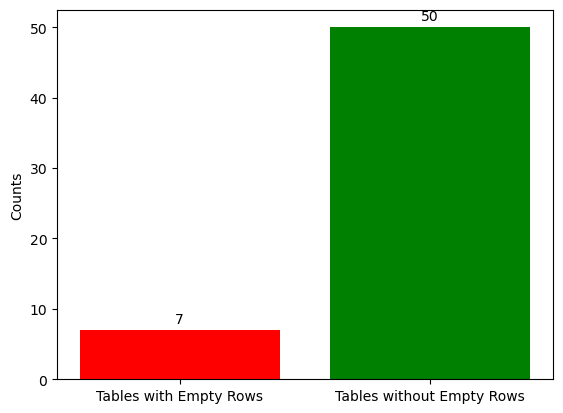

In [55]:
test_tables.display_empty_row_data()

In [56]:
os.listdir()

['sample_csvs_2024-09-27_02-15-58',
 'uniq_links.txt',
 'check_urls.py',
 'sample_csvs_2024-10-01_01-30-44',
 'valid_urls.txt',
 'sample_urls.py',
 'sample_csvs_2024-10-02_21-42-02',
 'csv_reader.ipynb',
 '.ipynb_checkpoints',
 'uniq_links_copy.txt',
 'sample_csvs_2024-09-26_19-46-26',
 'venv',
 '.git']

**Trying a new sample**

In [57]:
csv_directory = 'sample_csvs_2024-10-01_01-30-44'

In [58]:
tables_2 = Tables(csv_directory)

Problem reading file leicspart_nhs_uk_Library_2017Feb.csv: Error tokenizing data. C error: Expected 1 fields in line 5, saw 2

Problem reading file orr_gov_uk___data_assets_file_0020_19514_gpc_july_2015.csv: Error tokenizing data. C error: Expected 1 fields in line 10, saw 2

Problem reading file webarchive_nationalarchives_gov_uk_20121204163126_http___data_dft_gov_uk_departmental_monthly_spend_over_500_in_value_dft_monthly_spend_201012.csv: Error tokenizing data. C error: Expected 1 fields in line 5, saw 2



In [59]:
tables_2.errors

[{'file_name': 'leicspart_nhs_uk_Library_2017Feb.csv',
  'error': 'Error tokenizing data. C error: Expected 1 fields in line 5, saw 2\n'},
 {'file_name': 'orr_gov_uk___data_assets_file_0020_19514_gpc_july_2015.csv',
  'error': 'Error tokenizing data. C error: Expected 1 fields in line 10, saw 2\n'},
 {'file_name': 'webarchive_nationalarchives_gov_uk_20121204163126_http___data_dft_gov_uk_departmental_monthly_spend_over_500_in_value_dft_monthly_spend_201012.csv',
  'error': 'Error tokenizing data. C error: Expected 1 fields in line 5, saw 2\n'}]

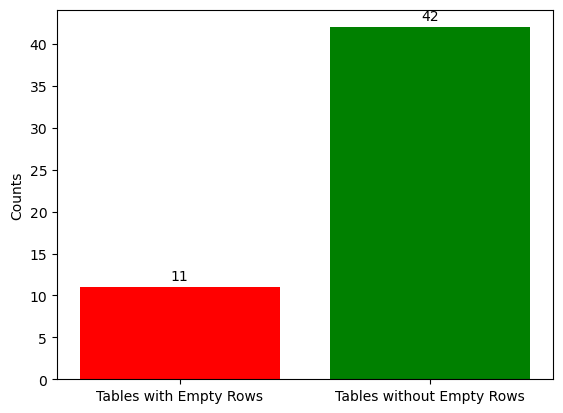

In [60]:
tables_2.display_empty_row_data()

## Testing new Json metadata

In [61]:
sample_3 = 'sample_csvs_2024-10-02_21-42-02'

In [62]:
tables3 = Tables(sample_3)

Problem reading file webarchive_nationalarchives_gov_uk_20180601151923_https___forestry_gov_uk_pdf_December25KFINAL_csv__FILE_December25KFINAL.csv: Error tokenizing data. C error: Expected 1 fields in line 5, saw 2

Problem reading file webarchive_nationalarchives_gov_uk_20180601151923_https___forestry_gov_uk_pdf_june10over25k_csv__FILE_june10over25k.csv: Error tokenizing data. C error: Expected 1 fields in line 5, saw 2

Problem reading file webarchive_nationalarchives_gov_uk___http___porthosp_nhs_uk_Downloads_Finance_2012_20Sep_20Return.csv: Error tokenizing data. C error: Expected 1 fields in line 5, saw 2

Problem reading file manchester_gov_uk_open_downloads_file_1026_grant_payments_july_2021.csv: Error tokenizing data. C error: Expected 1 fields in line 18, saw 2



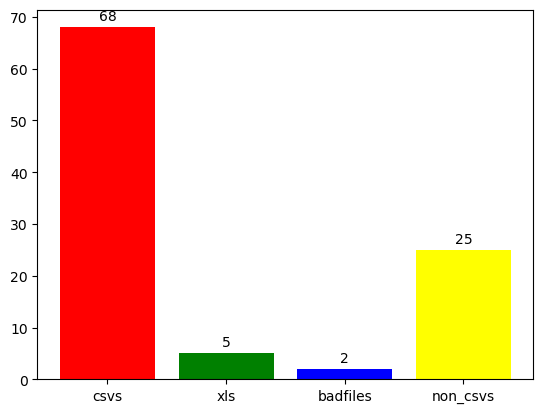

In [63]:
tables3.display_metadata()

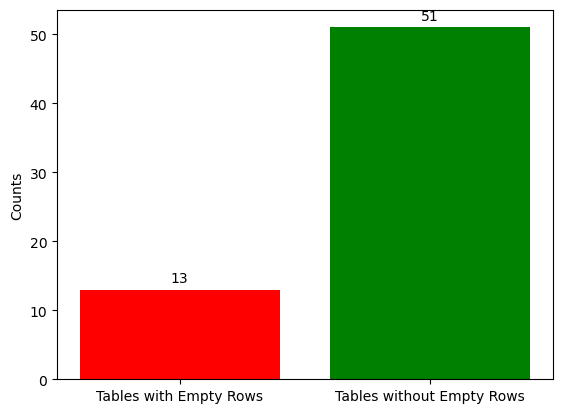

In [64]:
tables3.display_empty_row_data()

In [65]:
tables3.show_empty_tables()

DataFrame: admin_opendatani_gov_uk_dataset_e37520b0_ddb4_4cfa_b53f_a9c50ef21965_resource_d16d6808_9e48_4b42_a617_e26093df34f7_download_noids_week_17_20_2024_csv.csv

,0,1,2,3,4,5,6,7
0,Current weekly total of notifications of infec...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,of the two preceding years,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Notifications of Infectious Diseases, Week 1 -...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,Cumulative Totals,NaN,NaN
6,Disease,Week 20,Week 19,Week 18,Week 17,2024,2023,2022
7,NaN,NaN,NaN,NaN,NaN,Weeks,Weeks,Weeks
8,NaN,13/05 - 19/05,06/05 - 12/05,29/04 - 05/05,22/04 - 28/04,1-20,1-20,1-20
9,Acute Encephalitis/Meningitis Bacterial,0,0,0,0,13,18,6


DataFrame: assets_publishing_service_gov_uk_government_uploads_system_uploads_attachment_data_file_1064083_october_december_2021_disclosure_ministerial_meetings.csv

,0,1,2,3
0,Minister,Date,Name of organisation or individual,Purpose of meeting
1,Kwasi Kwarteng,2021-10-01,EDF,To discuss energy
2,Kwasi Kwarteng,2021-10-03,CF Industries,To discuss energy
3,Kwasi Kwarteng,2021-10-04,Air Liquide,To discuss chemicals
4,Kwasi Kwarteng,2021-10-07,Vifor Pharma,Visit to attend their official ceremony
...,...,...,...,...
512,Martin Callanan,2021-12-13,Institute of Chartered Accountants in England ...,To discuss the White Paper Restoring Trust in...
513,Martin Callanan,2021-12-14,Anaerobic Digestion and Bioresources Association,Speech discussing the Green Gas Support Scheme
514,Martin Callanan,2021-12-21,"Heat Pump Federation, Energy Efficiency Associ...",To discuss how BEIS can support the clean heat...
515,NaN,NaN,NaN,NaN


DataFrame: gov_uk_government_uploads_system_uploads_attachment_data_file_186443_workforce_management_2012_sep.csv

,0,1,2,3,4,5,6,7
0,"Department, Agency or NDPB",Numbers of exemptions approved and grade for t...,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,AA/AO,EO,HEO/SEO,Grade 6/7,SCS level,Other,TOTAL
2,DWP Corporate Centre,27,0,2,57,2,0,88
3,Shared Services,0,0,0,0,0,0,0
4,Operations,1556,0,16,1,1,0,1574
5,CMG (now part of DWP),634,0,0,3,3,0,640
6,HSE,1,2,56,3,2,0,64
7,The Pensions Regulator,0,0,0,0,0,120,120
8,NEST/PADA,0,0,0,0,0,42,42
9,Independent Review Service,0,0,0,0,0,0,0


DataFrame: gov_uk_government_uploads_system_uploads_attachment_data_file_670843_dft_hospitality_return_q3_2017.csv

,0,1,2,3,4
0,Minister,Date,Person or organisation that offered hospitality,Type of hospitality received,"Accompanied by spouse, family member(s) or fri..."
1,Chris Grayling,2017-09-21,Nigel Harris,National Rail Awards guest,No
2,NaN,NaN,NaN,NaN,NaN
3,John Hayes,Nil return,Nil return,Nil return,Nil return
4,NaN,NaN,NaN,NaN,NaN
5,Jesse Norman,Nil return,Nil return,Nil return,Nil return
6,NaN,NaN,NaN,NaN,NaN
7,Paul Maynard,2017-09-21,Angel Trains,Attendance at National Rail Awards reception,No
8,NaN,NaN,NaN,NaN,NaN
9,Lord Callanan,Nil return,Nil return,Nil return,Nil return


DataFrame: assets_publishing_service_gov_uk_government_uploads_system_uploads_attachment_data_file_1065313_dwp_special_advisers_meetings_oct_dec_2021.csv

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,Special Adviser,Date,Name of organisation or individual,Purpose of meeting,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Jess Prestidge,Nil Return,Nil Return,Nil Return,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ed Winfield,Nil Return,Nil Return,Nil Return,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tim Sculthorpe,Nil Return,Nil Return,Nil Return,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


DataFrame: nationalgallery_org_uk_upload_csv_transparency_return_february_2019.csv

,0,1,2,3,4,5,6,7
0,Department family,Entity,Date,Expense type,Expense area,Supplier,Transaction number,Amount
1,DCMS,National Gallery,22/02/2019,Rent,Buildings,Ashdown Phillips and Partners Ltd (rent),10317705,"161,822.75"
2,DCMS,National Gallery,22/02/2019,Rent,Buildings,Ashdown Phillips and Partners Ltd (service cha...,10317706,"40,343.64"
3,DCMS,National Gallery,01/03/2019,Professional Fees,Buildings,Atkins Limited t/a Faithful + Gould,10317835,"44,563.00"
4,DCMS,National Gallery,01/03/2019,Building Works,Buildings,CBRE Managed Services Ltd,10317968,"21,374.14"
5,DCMS,National Gallery,22/02/2019,Building Works,Buildings,CBRE Managed Services Ltd,10317712,"110,944.42"
6,DCMS,National Gallery,11/02/2019,Operational Consultants,Buildings,Colley Associates Limited,10318596,"24,900.00"
7,DCMS,National Gallery,22/02/2019,Gas,Buildings,Corona Energy Retail 4 Ltd,10317707,"46,867.66"
8,DCMS,National Gallery,01/03/2019,Contract cleaning,Buildings,DOC Cleaning Limited,10317834,"55,160.25"
9,DCMS,National Gallery,15/02/2019,Electricity,Buildings,EDF Energy 1 Limited,10317357,"62,775.86"


DataFrame: data_defra_gov_uk_Agriculture_APHA0414_Summary_of_Inspection_Statistics_Mandatory_Goods_2015.csv

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,NaN,Summary of National Import Inspection Statisti...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Type of Inspection,Botanical Name,No. of Consignments,PHMD Supplied?,Consignment Corrected Total for PHMD,Inspection Count,Inspected %,Doc Check Count,Doc %,ID Check Count,ID %,Failed Physical,Physical Failed %,Failed Doc,Failed Doc %,Failed ID,ID Failed %,Total Failed,Total Failed %
3,Mandatory,"Bulbs, corms etc for planting (excl. potatoes)",24,0,24,21,87.5,24,100,24,100,0,0,0,0,0,0,0,0
4,Mandatory,"Cuttings, and young plants",943,0,943,929,98.51537646,942,99.89395546,942,99.89395546,16,1.696712619,0,0,0,0,16,1.696712619
5,Mandatory,Grain,7,0,7,7,100,7,100,7,100,0,0,0,0,0,0,0,0
6,Mandatory,Mushroom Spawn,87,0,87,3,3.448275862,83,95.40229885,83,95.40229885,0,0,0,0,0,0,0,0
7,Mandatory,Other plants for planting,392,34,358,356,99.44134078,358,100,358,100,18,5.027932961,2,0.558659218,2,0.558659218,22,6.145251397
8,Mandatory,Potatoes,293,0,293,292,99.65870307,293,100,293,100,0,0,0,0,0,0,0,0
9,Mandatory,"Seeds, tissue cultures",408,0,408,292,71.56862745,403,98.7745098,401,98.28431373,0,0,3,0.735294118,3,0.735294118,6,1.470588235


DataFrame: admin_opendatani_gov_uk_dataset_e37520b0_ddb4_4cfa_b53f_a9c50ef21965_resource_62f55697_ffb5_4655_bd91_91f5ab67d2e4_download_noids_report_2015_week_7.csv

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Current weekly total of notifications of infec...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,of the two preceding years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Notifications of Infectious Diseases, Week 7, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,Weekly Totals,NaN,NaN,Cumulative Totals,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN
7,Disease,Week 07,Week 06,Week 05,Week 04,2015,2014,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,Weeks,Weeks,Weeks,NaN,,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,01 to 07,01 to 07,01 to 07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


DataFrame: s3_eu_west_1_amazonaws_com_data_defra_gov_uk_AnimalWelfare_milk_quota_purchaser_sizes_and_amounts_purchased_1994_to_2013.csv

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,Quota,< 100k,NaN,100k to 1M,NaN,1M to 3M,NaN,3M to 15M,NaN,15 to 100M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Year,No,Volume,No,Volume,No,Volume,No,Volume,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1994/95,17,0.7,23,9.1,19,35.9,18,136.8,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1995/96,17,0.7,29,14.2,9,18.5,22,162.3,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1996/97,18,0.6,24,10.4,18,30.8,27,212.1,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


DataFrame: assets_publishing_service_gov_uk_government_uploads_system_uploads_attachment_data_file_897879_April_2020_Over_25K_FC.csv

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FCE Over 25K Report,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sub Ledger Code,Sub Ledger Description,Description,Date Paid,Cost Centre,Cost Centre Name,Supplier Code,Supplier Name,Postcode,Transaction Reference,...,Line Description,Purchase Order Number,Account Code,Account Code Name,Activity Code,Activity Code Name,Job Description,Supplier Type,Contract Number,Expense Type
4,P11,FORESTRY COMMISSION PRIVATE,Grant,28/04/2020,001,Policy Advice Team,80000364,Bolton Forestry,CA1 2RW,8415,...,WCF CLAIM,NaN,11785,Private Woodland Grants,39,Cash,Woodland Carbon Fund grant,SME,8415,Grant
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


DataFrame: nhsbsa_nhs_uk_sites_default_files_2019_04_11_20__20February.csv

,0,1,2,3,4,5,6,7,8,9
0,Department family,Entity,Date,Expense type,Expense area,Supplier,Transaction number,Amount,Description,Supplier Post Code
1,Departmen of Health,NHS Business Services Authority,08/02/2019,Professional Fees,Supply Chain Management Division,UNIPART GROUP LIMITED,0050036209,"736,471.00",EU EXIT COST,OX4 2PG
2,Departmen of Health,NHS Business Services Authority,08/02/2019,Professional Fees,Supply Chain Management Division,UNIPART GROUP LIMITED,0050036210,"183,240.53",EU EXIT COSTS,OX4 2PG
3,Departmen of Health,NHS Business Services Authority,12/02/2019,Query,Supply Chain Management Division,IBM UK LTD,0050036215,"175,202.01",COMP 3 ESR JAN 19,PO6 3AF
4,Departmen of Health,NHS Business Services Authority,12/02/2019,Temporary Staff,Corporate Services,TRAINLINE.COM LTD,0050036224,"44,352.05",01.01.19 / 31/01/19 RAIL TICKETS,EC1N 2TD
...,...,...,...,...,...,...,...,...,...,...
67,Departmen of Health,NHS Business Services Authority,06/02/2019,Pharmacy Contractors,Prescription Pricing,NaN,NaN,"303,104.64",Payments to Pharmacy Contractors,NaN
68,Departmen of Health,NHS Business Services Authority,07/02/2019,Pharmacy Contractors,Prescription Pricing,NaN,NaN,"135,226.70",Payments to Pharmacy Contractors,NaN
69,Departmen of Health,NHS Business Services Authority,28/02/2019,Pharmacy Contractors,Prescription Pricing,NaN,NaN,"7,285,406.45",Payments to Pharmacy Contractors,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


DataFrame: s3_eu_west_1_amazonaws_com_data_defra_gov_uk_AnimalWelfare_cattle_movements_from_high_risk_tuberculosis_areas_may_2010.csv

,0,1,2,3,4,5,6
0,Departure Country,Departure AHDO,SECTION 1,SECTION 2,SECTION 3,SECTION 4,SECTION 5
1,ENGLAND,BURY ST EDMUNDS AHDO,7,3,346,14,0
2,NaN,CARLISLE AHDO,220,32,28,41,50
3,NaN,EXETER AHDO,545,156,0,799,110
4,NaN,GLOUCESTER AHDO,738,350,0,544,186
...,...,...,...,...,...,...,...
87,WALES,CAERNARFON AHDO,"4,369","6,747",0,"5,326",979
88,NaN,CARDIFF AHDO,"2,803","3,475",0,"2,961",350
89,NaN,CARMARTHEN AHDO,"6,063","6,224",0,"6,321",667
90,Sub-Total,NaN,"13,235","16,446",0,"14,608","1,996"


DataFrame: assets_publishing_service_gov_uk_government_uploads_system_uploads_attachment_data_file_860000_dwp_special_advisers_meetings_jul_sep_2019.csv

,0,1,2,3,4,5,6,7,8,9,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,Special Adviser,Date,Name of organisation or individual,Purpose of meeting,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Eleanor Shawcross,Nil return,Nil return,Nil return,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Jason Stein,Nil return,Nil return,Nil return,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alex Hitchcock,Nil return,Nil return,Nil return,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Rhiannon Padley,Nil return,Nil return,Nil return,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
test_df = tables3.empty_rows['empty_row_files'][0].dataframe
test_table = tables3.tables

In [67]:
test_df_table = tables3.empty_rows['empty_row_files'][0]
test_df_table.empty_row_indices

[Index([2, 4, 46, 49, 51, 52], dtype='int64')]

In [68]:
test_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       44 non-null     object
 1   1       39 non-null     object
 2   2       39 non-null     object
 3   3       39 non-null     object
 4   4       39 non-null     object
 5   5       41 non-null     object
 6   6       40 non-null     object
 7   7       40 non-null     object
dtypes: object(8)
memory usage: 3.4+ KB


In [69]:
test_df.shape

(53, 8)

## Testing a Fingerprint function

This will give us a count of values for each row, with 0 being an empty row. The code uses pandas vectorised functions so it's speedy.

In [70]:
value_count = test_df.notna().sum(axis=1)
value_count

0     1
1     1
2     0
3     1
4     0
5     1
6     8
7     3
8     7
9     8
10    8
11    8
12    8
13    8
14    8
15    8
16    8
17    8
18    8
19    8
20    8
21    8
22    8
23    8
24    8
25    8
26    8
27    8
28    8
29    8
30    8
31    8
32    8
33    8
34    8
35    8
36    8
37    8
38    8
39    8
40    8
41    8
42    8
43    8
44    8
45    8
46    0
47    1
48    1
49    0
50    1
51    0
52    0
dtype: int64

The fingerprint is best understood as each tuple representing (n blank rows, followed by n non blank rows)

In [71]:
fingerprint = []
blank_row_count = 0
filled_row_count = 0
blank_row = False

for count in value_count:
    #new blank row detected, update the fingerprint list
    if count == 0 and blank_row == False:
        fingerprint.append((blank_row_count, filled_row_count))
        #reset counts
        blank_row_count = 1
        filled_row_count = 0
        blank_row = True
    #An additional blank row detected, increment the count
    elif count == 0 and blank_row == True:
        blank_row_count += 1
    #non empty row detected, update fingerprint list
    elif count != 0 and blank_row == True:
        #reset the counts
        filled_row_count = 1
        blank_row = False
    #An additional non empty row detected, increment the count
    elif count != 0 and blank_row == False:
        filled_row_count += 1
#add last tuple
fingerprint.append((blank_row_count, filled_row_count))
        
        
        
        
        

In [72]:
fingerprint

[(0, 2), (1, 1), (1, 41), (1, 2), (1, 1), (2, 0)]

In [73]:
test_df

,0,1,2,3,4,5,6,7
0,Current weekly total of notifications of infec...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,of the two preceding years,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Notifications of Infectious Diseases, Week 1 -...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,Cumulative Totals,NaN,NaN
6,Disease,Week 20,Week 19,Week 18,Week 17,2024,2023,2022
7,NaN,NaN,NaN,NaN,NaN,Weeks,Weeks,Weeks
8,NaN,13/05 - 19/05,06/05 - 12/05,29/04 - 05/05,22/04 - 28/04,1-20,1-20,1-20
9,Acute Encephalitis/Meningitis Bacterial,0,0,0,0,13,18,6


**Let's add some NaN rows to the top of the test table**

In [74]:
nan_rows = pd.DataFrame(np.nan, index=[0, 1], columns=test_df.columns)

In [75]:
df_with_nans = pd.concat([nan_rows, test_df], ignore_index=True)

In [76]:
df_with_nans

,0,1,2,3,4,5,6,7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Current weekly total of notifications of infec...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,of the two preceding years,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"Notifications of Infectious Diseases, Week 1 -...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,Cumulative Totals,NaN,NaN
8,Disease,Week 20,Week 19,Week 18,Week 17,2024,2023,2022
9,NaN,NaN,NaN,NaN,NaN,Weeks,Weeks,Weeks


In [95]:
newvalue_count = df_with_nans.notna().sum(axis=1)

1

In [96]:
fingerprint = []
blank_row_count = 0
filled_row_count = 0
blank_row = False

if newvalue_count[0] == 0:
    blank_row = True

for count in newvalue_count:
    #new blank row detected, update the fingerprint list
    if count == 0 and blank_row == False:
        fingerprint.append((blank_row_count, filled_row_count))
        #reset counts
        blank_row_count = 1
        filled_row_count = 0
        blank_row = True
    #An additional blank row detected, increment the count
    elif count == 0 and blank_row == True:
        blank_row_count += 1
    #non empty row detected, update fingerprint list
    elif count != 0 and blank_row == True:
        #reset the counts
        filled_row_count = 1
        blank_row = False
    #An additional non empty row detected, increment the count
    elif count != 0 and blank_row == False:
        filled_row_count += 1
#add last tuple
fingerprint.append((blank_row_count, filled_row_count))

In [97]:
fingerprint

[(2, 2), (1, 1), (1, 41), (1, 2), (1, 1), (2, 0)]

In [80]:
table_list = [table for table in tables3.tables.values()]
for table in table_list:
    print(table.fingerprint)

[(0, 157)]
[(0, 119)]
[(0, 9)]
[(0, 144001)]
[(0, 41698)]
[(0, 2), (1, 1), (1, 41), (1, 2), (1, 1), (2, 0)]
[(0, 105)]
[(0, 4)]
[(0, 515), (1, 1)]
[(0, 88)]
[(0, 20), (2, 0)]
[(0, 4)]
[(0, 19)]
[(0, 58)]
[(0, 310)]
[(0, 4)]
[(0, 6360)]
[(0, 129)]
[(0, 2), (1, 1), (1, 1), (1, 1), (1, 1), (10, 0)]
[(0, 106201)]
[(0, 159)]
[(0, 4), (996, 0)]
[(0, 131)]
[(0, 447)]
[(0, 49)]
[(0, 159)]
[(0, 17), (4, 1)]
[(0, 1), (1, 10)]
[(0, 463261)]
[(0, 258)]
[(0, 14)]
[(0, 732)]
[(0, 23)]
[(0, 6346)]
[(0, 160)]
[(0, 84)]
[(0, 2), (1, 1), (2, 48), (2, 1), (2, 1)]
[(0, 1782)]
[(0, 11)]
[(0, 44)]
[(0, 329)]
[(0, 22), (1, 1), (20, 1), (4, 1), (13, 1), (63, 0)]
[(0, 3)]
[(0, 96)]
[(0, 56)]
[(0, 2)]
[(0, 372)]
[(0, 0), (1, 1), (1, 2), (1, 0)]
[(0, 147)]
[(0, 70), (2, 0)]
[(0, 4)]
[(0, 9)]
[(0, 151)]
[(0, 8)]
[(0, 20)]
[(0, 5)]
[(0, 13)]
[(0, 1668)]
[(0, 9)]
[(0, 16)]
[(0, 28), (4, 1), (1, 23), (4, 1), (1, 29)]
[(0, 10)]
[(0, 16)]
[(0, 5), (87, 0)]


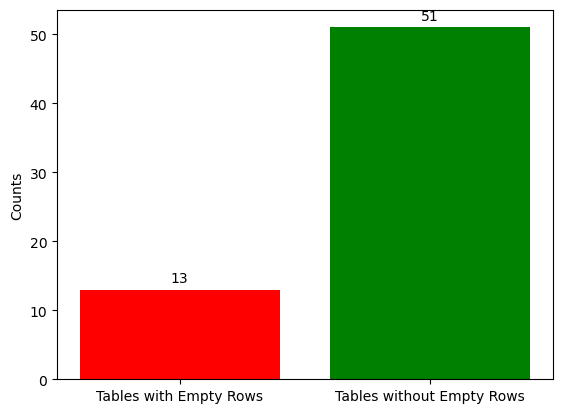

In [81]:
tables3.display_empty_row_data()

## Creating a heat map of NaNs and Values

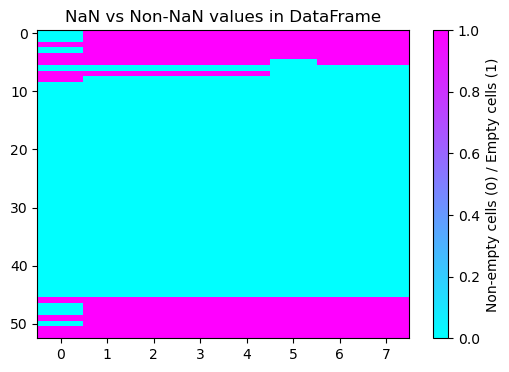

In [82]:
# Create a mask where NaNs are 1 and non-NaNs are 0
df = table_list[5].dataframe
nan_mask = df.isna().astype(int)

# Plotting the mask
plt.figure(figsize=(6, 4))
plt.imshow(nan_mask, cmap='cool', aspect='auto')  # Red for NaN (1), Green for non-NaN (0)
plt.colorbar(label='Non-empty cells (0) / Empty cells (1)')
plt.xticks(ticks=range(df.shape[1]), labels=df.columns)
plt.title("NaN vs Non-NaN values in DataFrame")
plt.show()


In [83]:
empty_row_dfs = [table.dataframe for table in tables3.empty_rows['empty_row_files']]

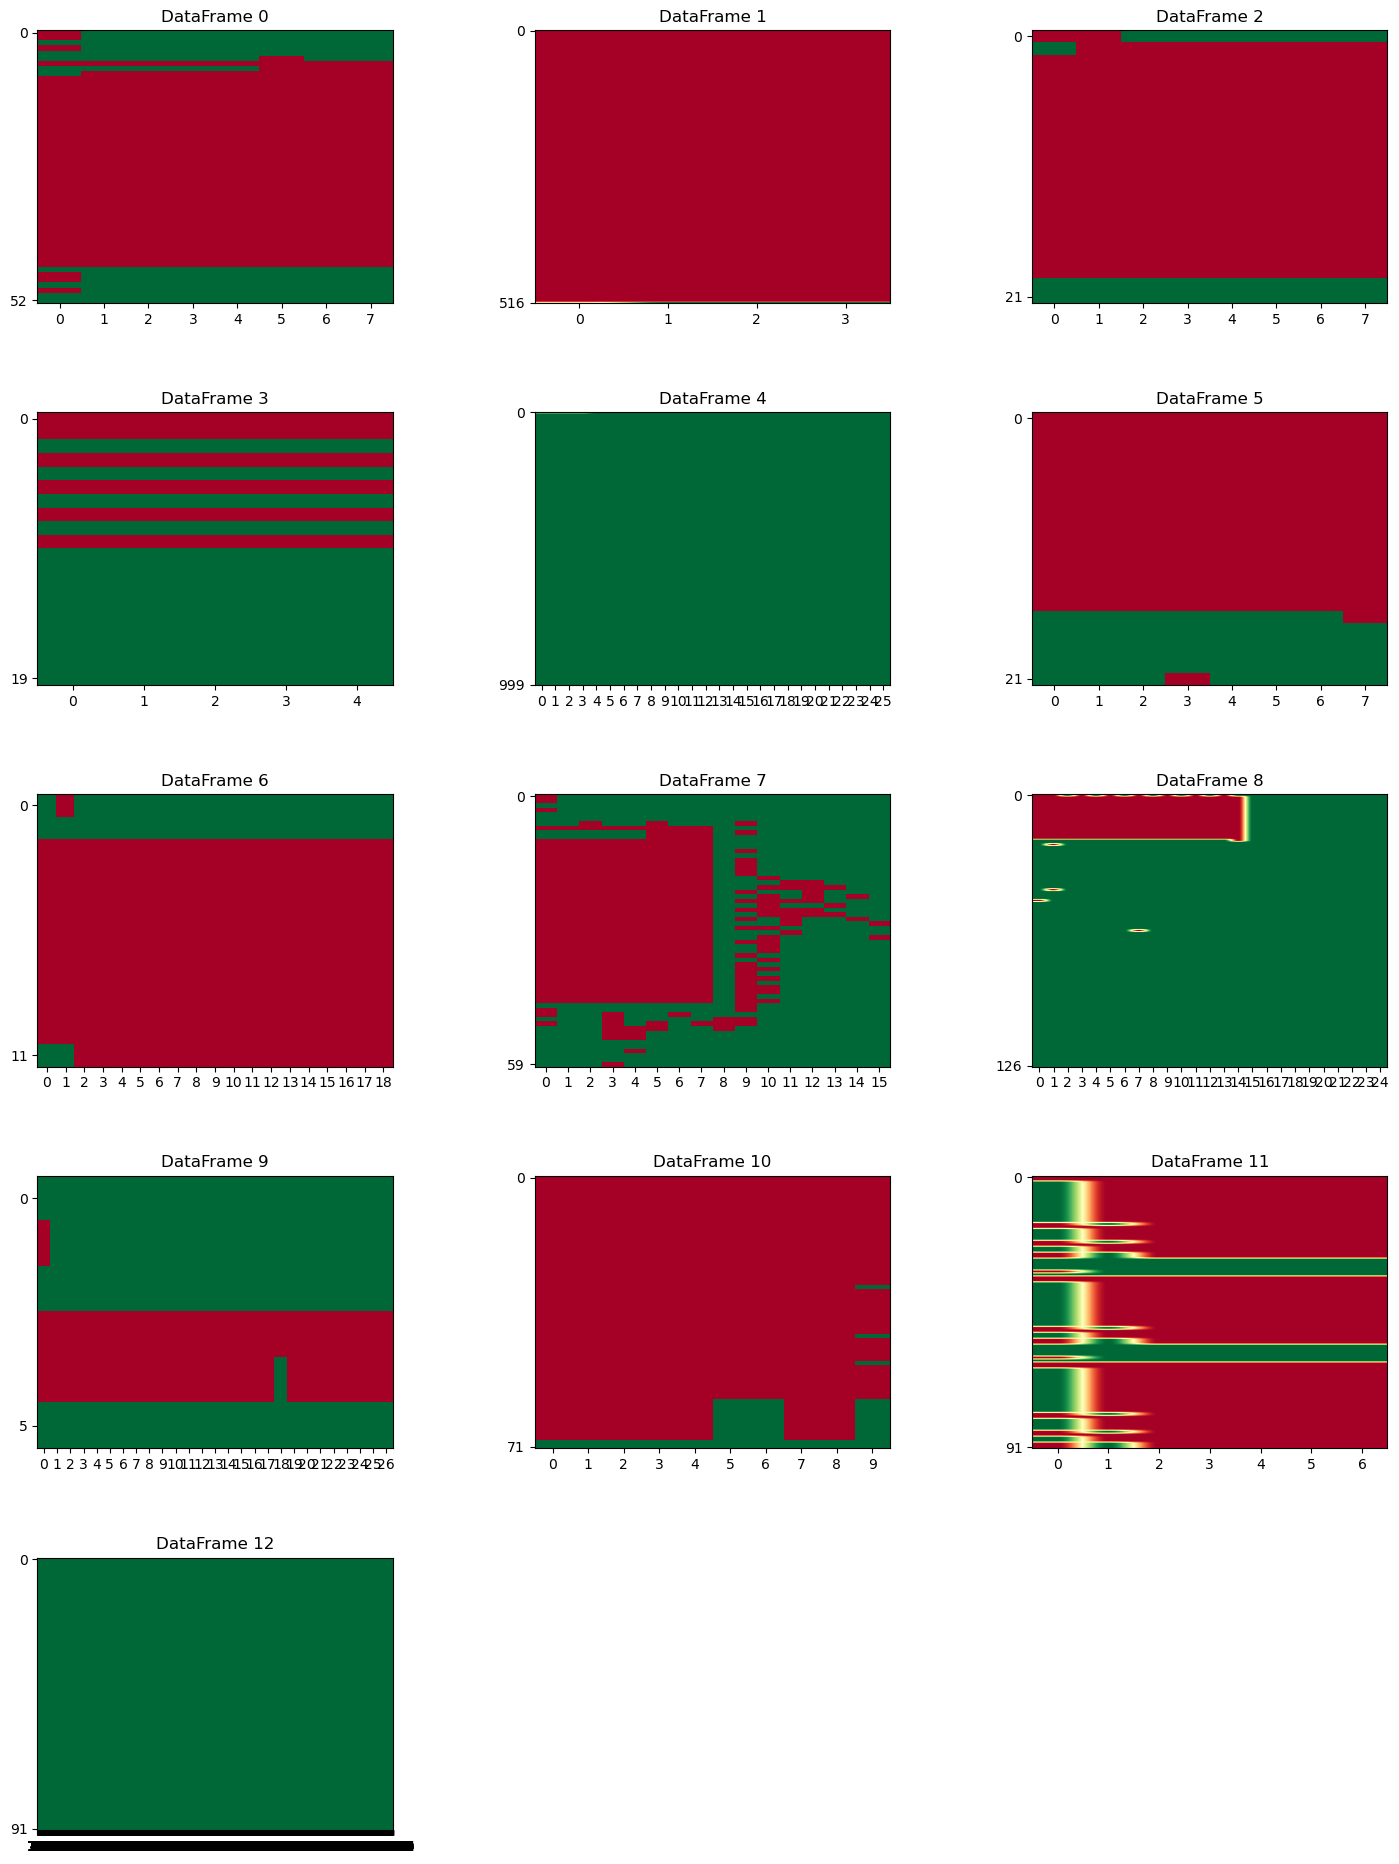

In [84]:



# Create a figure with enough space for 13 subplots
fig, axes = plt.subplots(5, 3, figsize=(15, 20))  # Adjust rows and cols to fit your DataFrames

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot each DataFrame
for i, df in enumerate(empty_row_dfs):
    nan_mask = df.isna().astype(int)
    ax = axes[i]
    im = ax.imshow(nan_mask, cmap='RdYlGn', aspect='auto')  # Red for NaN, Green for non-NaN
    ax.set_xticks(range(df.shape[1]))
    ax.set_xticklabels(df.columns)
    min_row = 0
    max_row = df.shape[0] - 1
    ax.set_yticks([min_row, max_row])
    ax.set_yticklabels([min_row, max_row])
    
    ax.set_title(f"DataFrame {i}")
    ax.set_title(f"DataFrame {i}")

# Hide any unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout with subplots_adjust for better spacing
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.4, hspace=0.4)

# Show the figure
plt.show()

In [85]:
empty_row_dfs[12]

,0,1,2,3,4,5,6,7,8,9,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,Special Adviser,Date,Name of organisation or individual,Purpose of meeting,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Eleanor Shawcross,Nil return,Nil return,Nil return,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Jason Stein,Nil return,Nil return,Nil return,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alex Hitchcock,Nil return,Nil return,Nil return,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Rhiannon Padley,Nil return,Nil return,Nil return,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


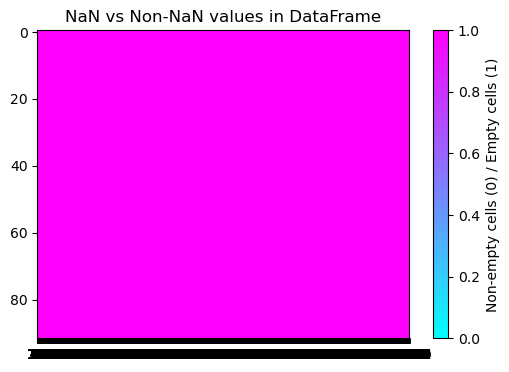

In [86]:
# Create a mask where NaNs are 1 and non-NaNs are 0
df = empty_row_dfs[12]
nan_mask = df.isna().astype(int)

# Plotting the mask
plt.figure(figsize=(6, 4))
plt.imshow(nan_mask, cmap='cool', aspect='auto')  # Red for NaN (1), Green for non-NaN (0)
plt.colorbar(label='Non-empty cells (0) / Empty cells (1)')
plt.xticks(ticks=range(df.shape[1]), labels=df.columns)
plt.title("NaN vs Non-NaN values in DataFrame")
plt.show()

In [87]:
empty_row_dfs[5]

,0,1,2,3,4,5,6,7
0,Department family,Entity,Date,Expense type,Expense area,Supplier,Transaction number,Amount
1,DCMS,National Gallery,22/02/2019,Rent,Buildings,Ashdown Phillips and Partners Ltd (rent),10317705,"161,822.75"
2,DCMS,National Gallery,22/02/2019,Rent,Buildings,Ashdown Phillips and Partners Ltd (service cha...,10317706,"40,343.64"
3,DCMS,National Gallery,01/03/2019,Professional Fees,Buildings,Atkins Limited t/a Faithful + Gould,10317835,"44,563.00"
4,DCMS,National Gallery,01/03/2019,Building Works,Buildings,CBRE Managed Services Ltd,10317968,"21,374.14"
5,DCMS,National Gallery,22/02/2019,Building Works,Buildings,CBRE Managed Services Ltd,10317712,"110,944.42"
6,DCMS,National Gallery,11/02/2019,Operational Consultants,Buildings,Colley Associates Limited,10318596,"24,900.00"
7,DCMS,National Gallery,22/02/2019,Gas,Buildings,Corona Energy Retail 4 Ltd,10317707,"46,867.66"
8,DCMS,National Gallery,01/03/2019,Contract cleaning,Buildings,DOC Cleaning Limited,10317834,"55,160.25"
9,DCMS,National Gallery,15/02/2019,Electricity,Buildings,EDF Energy 1 Limited,10317357,"62,775.86"


testing sniffer

In [88]:
cd 'sample_csvs_2024-09-27_02-15-58'

/Users/gibbons/registerdynamics/python_projects/url_tester/sample_csvs_2024-09-27_02-15-58


In [89]:
testcsv = 'admin_opendatani_gov_uk_dataset_001d8bb2_6a66_498c_bd9c_3adfa9364bcb_resource_cfbbf126_7343_4787_88cc_acb67d2a8b66_download_department_of_justice_performance_statistics_for_the_period_january_to_march_2021.csv'

In [90]:
with open(testcsv, newline='', encoding='latin1') as csvfile:
    dialect = csv.Sniffer().sniff(csvfile.read(1024))
    csvfile.seek(0)
    reader = csv.reader(csvfile, dialect)
    # ... process CSV file contents here ...
    print(dir(dialect))
    print(dir(reader))
    print(reader.dialect.lineterminator)


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_name', '_valid', '_validate', 'delimiter', 'doublequote', 'escapechar', 'lineterminator', 'quotechar', 'quoting', 'skipinitialspace']
['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__next__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'dialect', 'line_num']




In [91]:
csvs_directory = 'sample_csvs_2024-09-27_02-15-58'
file_names = os.listdir(csvs_directory)
delimiters = []

for file in (file_names):
    filepath = os.path.join(csvs_directory, file)
    try:
        with open(filepath, newline='', encoding='latin1') as csvfile:
            dialect = csv.Sniffer().sniff(csvfile.read(1024))
            csvfile.seek(0)
            #reader = csv.reader(csvfile, dialect)
            print(dialect.delimiter)
            delimiters.append(dialect.delimiter)
    except Exception as e:
        print(e)

FileNotFoundError: [Errno 2] No such file or directory: 'sample_csvs_2024-09-27_02-15-58'

In [ ]:
list(enumerate(delimiters))